# Music Genre Classification


<img src="../images/cover.png" alt="Girl in a jacket" width="700" height=auto>

# 1. Introduction


## 1.1.  Problem Understanding 

> 
##### Solution : Apply deep learning model to classify music genre.


## 1.2. Data 

> 

**Downloaded from :** https://www.kaggle.com/mathchi/diabetes-data-set



## 1.3. Evaluation Metrics :
> We will evaluate the performance of the model using : Accuracy, Precision  and Recall.

> + **Accuracy**
    > The percent (ratio) of cases classified correctly

$$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$
<p style="text-align: center; color:red"> (bad) 0 ≤ Accuracy ≤ 1 (good) </p> 

> + **Precision** => Accuracy of a predicted positive outcome 

$$Precision = \frac{TP}{TP + FP}$$
<p style="text-align: center; color:red"> (bad) 0 ≤ Precision ≤ 1 (good) </p> 

> + **Recall** => Measures model’s ability to predict a positive outcome 

$$Recall = \frac{TP}{TP + FN}$$
<p style="text-align: center; color:red"> (bad) 0 ≤ Recall ≤ 1 (good) </p> 

> + **F1 Score** => A combined metric, the harmonic mean of Precision and Recall. 

$$F1 Score = \frac{2*(Precision * Recall)}{Precision + Recall}$$
<p style="text-align: center; color:red"> (bad) 0 ≤ F1 Score ≤ 1 (good) </p>

+ Low when one or both of the Precision and Recall are low
+ High when both Precision and Recall are high



Read More : https://care.diabetesjournals.org/content/29/8/1866

## 1.4. Importing Packages

In [1]:
from helpers import *
import numpy as np
import pandas as pd
import librosa, librosa.display
import matplotlib.pyplot as plt
import os
import json


print("Libraries Imported ..")

Libraries Imported ..


## 1.5. Loading the data

In [2]:
DATASET_PATH = "../data/sub_raw_data"

file = DATASET_PATH + "/down/00176480_nohash_0.wav"
signal, sample_rate = librosa.load(file, sr=22050)
tempo, beat_frames = librosa.beat.beat_track(signal, sample_rate)
print("Dataset Loaded ... ")

Dataset Loaded ... 


# 2. Exploratory Data Analysis (EDA)

## 2.1. Undertanding the Data

> Tempo: is the pace at which your patterns replicate. You measure tempo in beats per minute (BPM). So if we talk about a piece of music being at 120 BPM, we say that every minute there are 120 beats (pulses).

> Beat: a period of time. It is basically the rhythm that you will clap to in a song. You get four beats in your bar in 4/4 time, for instance.

> Bar: a bar is a logical set of beats. Usually, bars get 3 or 4 beats, although other possibilities are possible.

> Step: In composition programs, I typically see this. It is normal to have a sequence of notes, such as 8 sixteenth notes, that are all of the same lengths. The difference between each note is the move. If you found this, you would like to walk on the sixteenth notes. Usually, you set eighth notes or triplets or quarter notes for your move.

> Rhythm: This is a list of musical sounds. In a statement, take all the notes and that is the rhythm.

> FFT : Fast Fourrier Transform

> FFT -> power spectrum

hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

### 2.1.1. Listen Audio Sound

In [3]:
import IPython.display as ipd
ipd.Audio(file) # load a local WAV file

### 2.1.2. Some audio properties

In [4]:
audio_properties(file, sr=22050)

Some audio properties
--------------------
|Audio Signal Length : (22050,)
|Sample Rate: 22050
|Tempo : 143.5546875 


,0,1
Beat Frame,4,22


### 2.1.3. Waveform

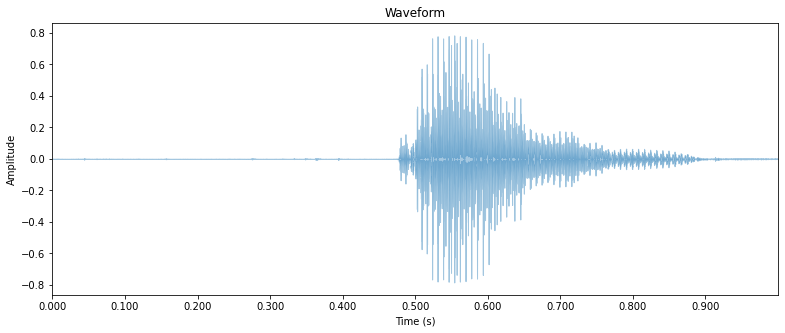

In [5]:
waveform(file)

### 2.1.4. Spectrum

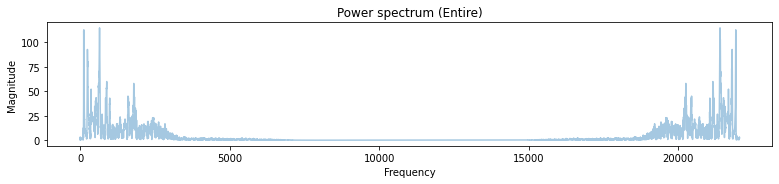

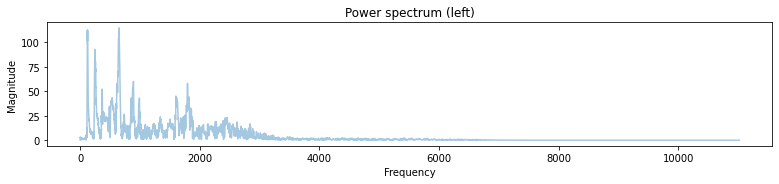

In [6]:
spectrum(file)

### 2.1.5. Spectogram

STFT : Hop Dength Duration = 0.023219954648526078 | Window Duration = 0.09287981859410431


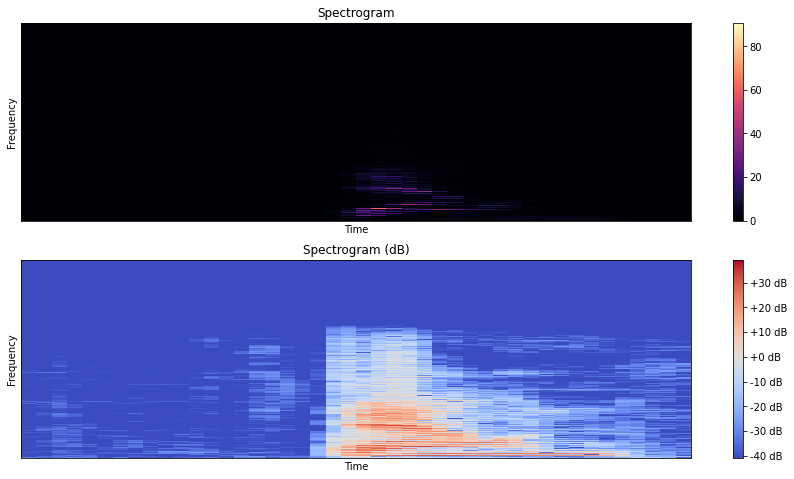

In [7]:
spectogram(file, hop_length=512, n_fft = 2048)

### 2.1.6. MFCCs

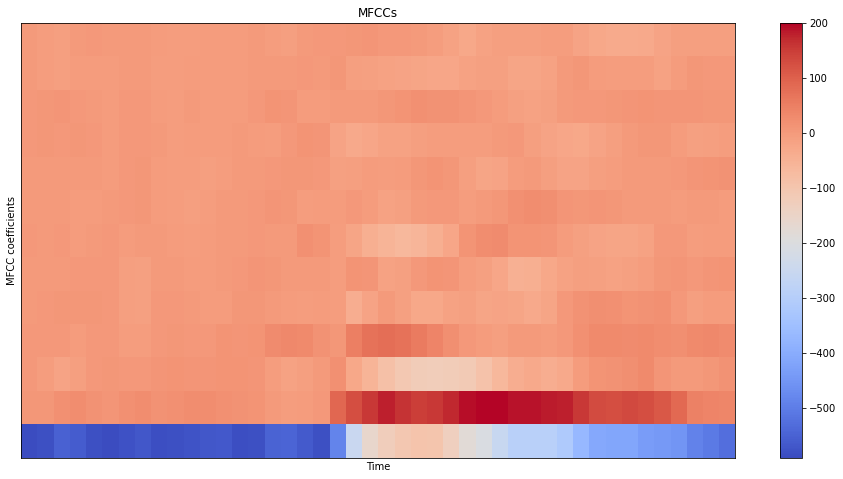

In [8]:
 mfccs(file, hop_length=512, n_fft = 2048,  n_mfcc=13)

> Variables mean value for outcome 0 are less than outcome 1.

# 3. Data Preparation

> extact mfccs

In [11]:
DATASET_PATH = "../data/sub_raw_data"
JSON_PATH = "../data/prepared_data.json"
SAMPLES_TO_CONSIDER = 22050 # 1 sec. of audio // sample rate number of sample per second

In [12]:
 preprocess_dataset(DATASET_PATH, JSON_PATH)


Processing: 'down'
../data/sub_raw_data/down/00176480_nohash_0.wav: 0
../data/sub_raw_data/down/004ae714_nohash_0.wav: 0
../data/sub_raw_data/down/00b01445_nohash_0.wav: 0
../data/sub_raw_data/down/00b01445_nohash_1.wav: 0
../data/sub_raw_data/down/00f0204f_nohash_0.wav: 0
../data/sub_raw_data/down/0132a06d_nohash_0.wav: 0
../data/sub_raw_data/down/0132a06d_nohash_1.wav: 0
../data/sub_raw_data/down/0132a06d_nohash_2.wav: 0
../data/sub_raw_data/down/0132a06d_nohash_3.wav: 0
../data/sub_raw_data/down/0132a06d_nohash_4.wav: 0
../data/sub_raw_data/down/0137b3f4_nohash_0.wav: 0
../data/sub_raw_data/down/0137b3f4_nohash_1.wav: 0
../data/sub_raw_data/down/0137b3f4_nohash_2.wav: 0
../data/sub_raw_data/down/0137b3f4_nohash_3.wav: 0
../data/sub_raw_data/down/0137b3f4_nohash_4.wav: 0
../data/sub_raw_data/down/014f9f65_nohash_0.wav: 0
../data/sub_raw_data/down/016e2c6d_nohash_0.wav: 0
../data/sub_raw_data/down/016e2c6d_nohash_1.wav: 0
../data/sub_raw_data/down/016e2c6d_nohash_2.wav: 0
../data/sub

../data/sub_raw_data/down/1816b768_nohash_1.wav: 0
../data/sub_raw_data/down/1851e33b_nohash_0.wav: 0
../data/sub_raw_data/down/187af8be_nohash_0.wav: 0
../data/sub_raw_data/down/18a8f03f_nohash_0.wav: 0
../data/sub_raw_data/down/18a8f03f_nohash_1.wav: 0
../data/sub_raw_data/down/190821dc_nohash_0.wav: 0
../data/sub_raw_data/down/190821dc_nohash_1.wav: 0
../data/sub_raw_data/down/190821dc_nohash_2.wav: 0
../data/sub_raw_data/down/190821dc_nohash_3.wav: 0
../data/sub_raw_data/down/190821dc_nohash_4.wav: 0
../data/sub_raw_data/down/1942abd7_nohash_0.wav: 0
../data/sub_raw_data/down/19e246ad_nohash_0.wav: 0
../data/sub_raw_data/down/19f9c115_nohash_0.wav: 0
../data/sub_raw_data/down/1a4259c3_nohash_0.wav: 0
../data/sub_raw_data/down/1a5b9ca4_nohash_0.wav: 0
../data/sub_raw_data/down/1a5b9ca4_nohash_1.wav: 0
../data/sub_raw_data/down/1a673010_nohash_0.wav: 0
../data/sub_raw_data/down/1a6eca98_nohash_0.wav: 0
../data/sub_raw_data/down/1a892463_nohash_0.wav: 0
../data/sub_raw_data/down/1a9af

../data/sub_raw_data/down/2a0b413e_nohash_0.wav: 0
../data/sub_raw_data/down/2ad772d6_nohash_0.wav: 0
../data/sub_raw_data/down/2aec99ec_nohash_0.wav: 0
../data/sub_raw_data/down/2b715941_nohash_0.wav: 0
../data/sub_raw_data/down/2bdbe5f7_nohash_0.wav: 0
../data/sub_raw_data/down/2bdbe5f7_nohash_1.wav: 0
../data/sub_raw_data/down/2bdbe5f7_nohash_2.wav: 0
../data/sub_raw_data/down/2bdbe5f7_nohash_3.wav: 0
../data/sub_raw_data/down/2bdbe5f7_nohash_4.wav: 0
../data/sub_raw_data/down/2bfe70ef_nohash_0.wav: 0
../data/sub_raw_data/down/2c6d3924_nohash_0.wav: 0
../data/sub_raw_data/down/2c7c33e8_nohash_0.wav: 0
../data/sub_raw_data/down/2c7c33e8_nohash_1.wav: 0
../data/sub_raw_data/down/2cec1d47_nohash_0.wav: 0
../data/sub_raw_data/down/2cec1d47_nohash_1.wav: 0
../data/sub_raw_data/down/2cf28b70_nohash_0.wav: 0
../data/sub_raw_data/down/2d3c8dcb_nohash_0.wav: 0
../data/sub_raw_data/down/2d3c8dcb_nohash_1.wav: 0
../data/sub_raw_data/down/2d82a556_nohash_0.wav: 0
../data/sub_raw_data/down/2d82a

../data/sub_raw_data/down/3c257192_nohash_4.wav: 0
../data/sub_raw_data/down/3c6d55b3_nohash_0.wav: 0
../data/sub_raw_data/down/3c8dc702_nohash_0.wav: 0
../data/sub_raw_data/down/3ca784ec_nohash_0.wav: 0
../data/sub_raw_data/down/3cdecb0b_nohash_0.wav: 0
../data/sub_raw_data/down/3d3ddaf8_nohash_0.wav: 0
../data/sub_raw_data/down/3d53244b_nohash_0.wav: 0
../data/sub_raw_data/down/3d53244b_nohash_1.wav: 0
../data/sub_raw_data/down/3d53244b_nohash_2.wav: 0
../data/sub_raw_data/down/3d53244b_nohash_3.wav: 0
../data/sub_raw_data/down/3d53244b_nohash_4.wav: 0
../data/sub_raw_data/down/3d6bee47_nohash_0.wav: 0
../data/sub_raw_data/down/3d6bee47_nohash_1.wav: 0
../data/sub_raw_data/down/3d6bee47_nohash_2.wav: 0
../data/sub_raw_data/down/3d9200b9_nohash_0.wav: 0
../data/sub_raw_data/down/3da7f617_nohash_0.wav: 0
../data/sub_raw_data/down/3da7f617_nohash_1.wav: 0
../data/sub_raw_data/down/3dfd6c23_nohash_0.wav: 0
../data/sub_raw_data/down/3dfd6c23_nohash_1.wav: 0
../data/sub_raw_data/down/3e2ba

../data/sub_raw_data/down/53578f4e_nohash_0.wav: 0
../data/sub_raw_data/down/538e1856_nohash_0.wav: 0
../data/sub_raw_data/down/53d5b86f_nohash_0.wav: 0
../data/sub_raw_data/down/53eb0a88_nohash_0.wav: 0
../data/sub_raw_data/down/53fd1780_nohash_0.wav: 0
../data/sub_raw_data/down/53fd1780_nohash_1.wav: 0
../data/sub_raw_data/down/541120c7_nohash_0.wav: 0
../data/sub_raw_data/down/541120c7_nohash_1.wav: 0
../data/sub_raw_data/down/541120c7_nohash_2.wav: 0
../data/sub_raw_data/down/54d9ccb5_nohash_0.wav: 0
../data/sub_raw_data/down/54d9ccb5_nohash_1.wav: 0
../data/sub_raw_data/down/553f1a79_nohash_0.wav: 0
../data/sub_raw_data/down/553f1a79_nohash_1.wav: 0
../data/sub_raw_data/down/5588c7e6_nohash_0.wav: 0
../data/sub_raw_data/down/5588c7e6_nohash_1.wav: 0
../data/sub_raw_data/down/5628d7b7_nohash_0.wav: 0
../data/sub_raw_data/down/563aa4e6_nohash_0.wav: 0
../data/sub_raw_data/down/563aa4e6_nohash_1.wav: 0
../data/sub_raw_data/down/563aa4e6_nohash_2.wav: 0
../data/sub_raw_data/down/563aa

../data/sub_raw_data/down/692a88e6_nohash_1.wav: 0
../data/sub_raw_data/down/692a88e6_nohash_2.wav: 0
../data/sub_raw_data/down/692a88e6_nohash_3.wav: 0
../data/sub_raw_data/down/692a88e6_nohash_4.wav: 0
../data/sub_raw_data/down/6940f7f3_nohash_0.wav: 0
../data/sub_raw_data/down/695c2127_nohash_0.wav: 0
../data/sub_raw_data/down/6982fc2a_nohash_0.wav: 0
../data/sub_raw_data/down/69f609ec_nohash_0.wav: 0
../data/sub_raw_data/down/6a2fb9a5_nohash_0.wav: 0
../data/sub_raw_data/down/6a497f80_nohash_0.wav: 0
../data/sub_raw_data/down/6a700f9d_nohash_0.wav: 0
../data/sub_raw_data/down/6a861f21_nohash_1.wav: 0
../data/sub_raw_data/down/6aafb34f_nohash_0.wav: 0
../data/sub_raw_data/down/6ac35824_nohash_0.wav: 0
../data/sub_raw_data/down/6adb8ad9_nohash_0.wav: 0
../data/sub_raw_data/down/6af4aa07_nohash_0.wav: 0
../data/sub_raw_data/down/6af4aa07_nohash_1.wav: 0
../data/sub_raw_data/down/6af4aa07_nohash_2.wav: 0
../data/sub_raw_data/down/6b7d5101_nohash_0.wav: 0
../data/sub_raw_data/down/6b7d5

../data/sub_raw_data/down/7e2d5caf_nohash_0.wav: 0
../data/sub_raw_data/down/7e2d5caf_nohash_1.wav: 0
../data/sub_raw_data/down/7e4fa1d8_nohash_0.wav: 0
../data/sub_raw_data/down/7e556a2c_nohash_0.wav: 0
../data/sub_raw_data/down/7e556a2c_nohash_1.wav: 0
../data/sub_raw_data/down/7e6bd776_nohash_0.wav: 0
../data/sub_raw_data/down/7e6bd776_nohash_1.wav: 0
../data/sub_raw_data/down/7ea032f3_nohash_0.wav: 0
../data/sub_raw_data/down/7ea032f3_nohash_1.wav: 0
../data/sub_raw_data/down/7ea032f3_nohash_2.wav: 0
../data/sub_raw_data/down/7ea032f3_nohash_3.wav: 0
../data/sub_raw_data/down/7ea032f3_nohash_4.wav: 0
../data/sub_raw_data/down/7eee5973_nohash_0.wav: 0
../data/sub_raw_data/down/7f74626f_nohash_0.wav: 0
../data/sub_raw_data/down/7f74626f_nohash_1.wav: 0
../data/sub_raw_data/down/7f74626f_nohash_2.wav: 0
../data/sub_raw_data/down/7f74626f_nohash_3.wav: 0
../data/sub_raw_data/down/7f74626f_nohash_4.wav: 0
../data/sub_raw_data/down/7fd25f7c_nohash_0.wav: 0
../data/sub_raw_data/down/7fd25

../data/sub_raw_data/down/918a2473_nohash_0.wav: 0
../data/sub_raw_data/down/918a2473_nohash_1.wav: 0
../data/sub_raw_data/down/918a2473_nohash_2.wav: 0
../data/sub_raw_data/down/918a2473_nohash_3.wav: 0
../data/sub_raw_data/down/918a2473_nohash_4.wav: 0
../data/sub_raw_data/down/9190045a_nohash_0.wav: 0
../data/sub_raw_data/down/924c1a04_nohash_0.wav: 0
../data/sub_raw_data/down/924c1a04_nohash_1.wav: 0
../data/sub_raw_data/down/92a9c5e6_nohash_0.wav: 0
../data/sub_raw_data/down/92a9c5e6_nohash_1.wav: 0
../data/sub_raw_data/down/92a9c5e6_nohash_2.wav: 0
../data/sub_raw_data/down/92a9c5e6_nohash_3.wav: 0
../data/sub_raw_data/down/92a9c5e6_nohash_4.wav: 0
../data/sub_raw_data/down/92b0a735_nohash_0.wav: 0
../data/sub_raw_data/down/92e17cc4_nohash_0.wav: 0
../data/sub_raw_data/down/9385508d_nohash_0.wav: 0
../data/sub_raw_data/down/94b5b397_nohash_0.wav: 0
../data/sub_raw_data/down/94de6a6a_nohash_0.wav: 0
../data/sub_raw_data/down/94de6a6a_nohash_1.wav: 0
../data/sub_raw_data/down/94de6

../data/sub_raw_data/down/a42a88ff_nohash_0.wav: 0
../data/sub_raw_data/down/a4b21cbc_nohash_0.wav: 0
../data/sub_raw_data/down/a4b21cbc_nohash_1.wav: 0
../data/sub_raw_data/down/a4baac4e_nohash_0.wav: 0
../data/sub_raw_data/down/a4ca3afe_nohash_0.wav: 0
../data/sub_raw_data/down/a4e8a997_nohash_0.wav: 0
../data/sub_raw_data/down/a4e8a997_nohash_1.wav: 0
../data/sub_raw_data/down/a50a98d2_nohash_0.wav: 0
../data/sub_raw_data/down/a50a98d2_nohash_1.wav: 0
../data/sub_raw_data/down/a518d1cf_nohash_0.wav: 0
../data/sub_raw_data/down/a518d1cf_nohash_1.wav: 0
../data/sub_raw_data/down/a527cb3c_nohash_0.wav: 0
../data/sub_raw_data/down/a583c5b0_nohash_0.wav: 0
../data/sub_raw_data/down/a5b24175_nohash_0.wav: 0
../data/sub_raw_data/down/a6285644_nohash_0.wav: 0
../data/sub_raw_data/down/a6285644_nohash_1.wav: 0
../data/sub_raw_data/down/a6d586b7_nohash_0.wav: 0
../data/sub_raw_data/down/a6d586b7_nohash_1.wav: 0
../data/sub_raw_data/down/a6d586b7_nohash_2.wav: 0
../data/sub_raw_data/down/a6d58

../data/sub_raw_data/down/b7a0754f_nohash_0.wav: 0
../data/sub_raw_data/down/b7a0754f_nohash_1.wav: 0
../data/sub_raw_data/down/b7a0754f_nohash_2.wav: 0
../data/sub_raw_data/down/b7a0754f_nohash_3.wav: 0
../data/sub_raw_data/down/b7a0754f_nohash_4.wav: 0
../data/sub_raw_data/down/b80d6c5e_nohash_0.wav: 0
../data/sub_raw_data/down/b80d6c5e_nohash_1.wav: 0
../data/sub_raw_data/down/b83c1acf_nohash_0.wav: 0
../data/sub_raw_data/down/b83c1acf_nohash_1.wav: 0
../data/sub_raw_data/down/b83c1acf_nohash_2.wav: 0
../data/sub_raw_data/down/b83c1acf_nohash_3.wav: 0
../data/sub_raw_data/down/b83c1acf_nohash_4.wav: 0
../data/sub_raw_data/down/b843de62_nohash_0.wav: 0
../data/sub_raw_data/down/b87bdb22_nohash_0.wav: 0
../data/sub_raw_data/down/b87bdb22_nohash_1.wav: 0
../data/sub_raw_data/down/b87bdb22_nohash_2.wav: 0
../data/sub_raw_data/down/b87bdb22_nohash_3.wav: 0
../data/sub_raw_data/down/b87bdb22_nohash_4.wav: 0
../data/sub_raw_data/down/b8897f1c_nohash_0.wav: 0
../data/sub_raw_data/down/b8c48

../data/sub_raw_data/down/c53b335a_nohash_1.wav: 0
../data/sub_raw_data/down/c5570933_nohash_0.wav: 0
../data/sub_raw_data/down/c578beb0_nohash_0.wav: 0
../data/sub_raw_data/down/c5c60d8d_nohash_0.wav: 0
../data/sub_raw_data/down/c634a189_nohash_0.wav: 0
../data/sub_raw_data/down/c634a189_nohash_1.wav: 0
../data/sub_raw_data/down/c634a189_nohash_2.wav: 0
../data/sub_raw_data/down/c634a189_nohash_3.wav: 0
../data/sub_raw_data/down/c634a189_nohash_4.wav: 0
../data/sub_raw_data/down/c6389ab0_nohash_0.wav: 0
../data/sub_raw_data/down/c661be6e_nohash_0.wav: 0
../data/sub_raw_data/down/c661be6e_nohash_1.wav: 0
../data/sub_raw_data/down/c661be6e_nohash_2.wav: 0
../data/sub_raw_data/down/c661be6e_nohash_3.wav: 0
../data/sub_raw_data/down/c6ee87a7_nohash_0.wav: 0
../data/sub_raw_data/down/c6ee87a7_nohash_1.wav: 0
../data/sub_raw_data/down/c6ee87a7_nohash_2.wav: 0
../data/sub_raw_data/down/c6ee87a7_nohash_3.wav: 0
../data/sub_raw_data/down/c6ee87a7_nohash_4.wav: 0
../data/sub_raw_data/down/c7124

../data/sub_raw_data/down/d7529c0c_nohash_0.wav: 0
../data/sub_raw_data/down/d7559b2d_nohash_0.wav: 0
../data/sub_raw_data/down/d78858d9_nohash_0.wav: 0
../data/sub_raw_data/down/d7a58714_nohash_0.wav: 0
../data/sub_raw_data/down/d7c60815_nohash_0.wav: 0
../data/sub_raw_data/down/d84829e0_nohash_0.wav: 0
../data/sub_raw_data/down/d8521ea0_nohash_0.wav: 0
../data/sub_raw_data/down/d8521ea0_nohash_1.wav: 0
../data/sub_raw_data/down/d85270c1_nohash_0.wav: 0
../data/sub_raw_data/down/d85270c1_nohash_1.wav: 0
../data/sub_raw_data/down/d8a5ace5_nohash_1.wav: 0
../data/sub_raw_data/down/d8a5ace5_nohash_2.wav: 0
../data/sub_raw_data/down/d8c314c0_nohash_0.wav: 0
../data/sub_raw_data/down/d8c52371_nohash_0.wav: 0
../data/sub_raw_data/down/d8ed3745_nohash_0.wav: 0
../data/sub_raw_data/down/d8ee4734_nohash_0.wav: 0
../data/sub_raw_data/down/d8ee4734_nohash_1.wav: 0
../data/sub_raw_data/down/d90b4138_nohash_0.wav: 0
../data/sub_raw_data/down/d90b4138_nohash_1.wav: 0
../data/sub_raw_data/down/d90b4

../data/sub_raw_data/down/e7ea8b76_nohash_3.wav: 0
../data/sub_raw_data/down/e7ea8b76_nohash_4.wav: 0
../data/sub_raw_data/down/e7ea8b76_nohash_5.wav: 0
../data/sub_raw_data/down/e900b652_nohash_0.wav: 0
../data/sub_raw_data/down/e9287461_nohash_0.wav: 0
../data/sub_raw_data/down/e9287461_nohash_1.wav: 0
../data/sub_raw_data/down/e96a5020_nohash_0.wav: 0
../data/sub_raw_data/down/e96a5020_nohash_1.wav: 0
../data/sub_raw_data/down/e96a5020_nohash_2.wav: 0
../data/sub_raw_data/down/e9901cf0_nohash_0.wav: 0
../data/sub_raw_data/down/ea7ca285_nohash_0.wav: 0
../data/sub_raw_data/down/ead2934a_nohash_0.wav: 0
../data/sub_raw_data/down/eb0676ec_nohash_0.wav: 0
../data/sub_raw_data/down/eb0676ec_nohash_1.wav: 0
../data/sub_raw_data/down/eb0676ec_nohash_2.wav: 0
../data/sub_raw_data/down/eb0676ec_nohash_3.wav: 0
../data/sub_raw_data/down/eb0676ec_nohash_4.wav: 0
../data/sub_raw_data/down/eb3d8eb1_nohash_0.wav: 0
../data/sub_raw_data/down/eb3f7d82_nohash_0.wav: 0
../data/sub_raw_data/down/eb3f7

../data/sub_raw_data/down/fbdc07bb_nohash_1.wav: 0
../data/sub_raw_data/down/fc2411fe_nohash_0.wav: 0
../data/sub_raw_data/down/fc28c8d8_nohash_0.wav: 0
../data/sub_raw_data/down/fc94edb0_nohash_0.wav: 0
../data/sub_raw_data/down/fcb25a78_nohash_0.wav: 0
../data/sub_raw_data/down/fce65496_nohash_0.wav: 0
../data/sub_raw_data/down/fce96bac_nohash_0.wav: 0
../data/sub_raw_data/down/fd32732a_nohash_0.wav: 0
../data/sub_raw_data/down/fd32732a_nohash_1.wav: 0
../data/sub_raw_data/down/fd395b74_nohash_0.wav: 0
../data/sub_raw_data/down/fd395b74_nohash_1.wav: 0
../data/sub_raw_data/down/fd395b74_nohash_2.wav: 0
../data/sub_raw_data/down/fd395b74_nohash_3.wav: 0
../data/sub_raw_data/down/fd395b74_nohash_4.wav: 0
../data/sub_raw_data/down/fda46b78_nohash_0.wav: 0
../data/sub_raw_data/down/fda46b78_nohash_1.wav: 0
../data/sub_raw_data/down/fe291fa9_nohash_0.wav: 0
../data/sub_raw_data/down/fe291fa9_nohash_1.wav: 0
../data/sub_raw_data/down/fe5c4a7a_nohash_0.wav: 0
../data/sub_raw_data/down/fe5c4

../data/sub_raw_data/go/12529547_nohash_0.wav: 1
../data/sub_raw_data/go/126403d4_nohash_0.wav: 1
../data/sub_raw_data/go/126a31d2_nohash_0.wav: 1
../data/sub_raw_data/go/126a31d2_nohash_1.wav: 1
../data/sub_raw_data/go/129c7d8d_nohash_0.wav: 1
../data/sub_raw_data/go/12c206ea_nohash_1.wav: 1
../data/sub_raw_data/go/1338a799_nohash_0.wav: 1
../data/sub_raw_data/go/135c6841_nohash_0.wav: 1
../data/sub_raw_data/go/1365dd89_nohash_0.wav: 1
../data/sub_raw_data/go/14587ff0_nohash_0.wav: 1
../data/sub_raw_data/go/14587ff0_nohash_1.wav: 1
../data/sub_raw_data/go/14587ff0_nohash_2.wav: 1
../data/sub_raw_data/go/146d97db_nohash_0.wav: 1
../data/sub_raw_data/go/14872d06_nohash_1.wav: 1
../data/sub_raw_data/go/14872d06_nohash_2.wav: 1
../data/sub_raw_data/go/15b0c947_nohash_0.wav: 1
../data/sub_raw_data/go/15b0c947_nohash_1.wav: 1
../data/sub_raw_data/go/15b0c947_nohash_2.wav: 1
../data/sub_raw_data/go/15c563d7_nohash_0.wav: 1
../data/sub_raw_data/go/15c563d7_nohash_1.wav: 1
../data/sub_raw_data

../data/sub_raw_data/go/28ce0c58_nohash_5.wav: 1
../data/sub_raw_data/go/28ce0c58_nohash_6.wav: 1
../data/sub_raw_data/go/28e47b1a_nohash_0.wav: 1
../data/sub_raw_data/go/28e47b1a_nohash_1.wav: 1
../data/sub_raw_data/go/28e47b1a_nohash_2.wav: 1
../data/sub_raw_data/go/28e47b1a_nohash_3.wav: 1
../data/sub_raw_data/go/28e47b1a_nohash_4.wav: 1
../data/sub_raw_data/go/28ed6bc9_nohash_0.wav: 1
../data/sub_raw_data/go/28ed6bc9_nohash_1.wav: 1
../data/sub_raw_data/go/28ed6bc9_nohash_2.wav: 1
../data/sub_raw_data/go/28ed6bc9_nohash_3.wav: 1
../data/sub_raw_data/go/28ed6bc9_nohash_4.wav: 1
../data/sub_raw_data/go/28ef2a01_nohash_1.wav: 1
../data/sub_raw_data/go/2903efb3_nohash_0.wav: 1
../data/sub_raw_data/go/29b81b73_nohash_0.wav: 1
../data/sub_raw_data/go/29fb33da_nohash_0.wav: 1
../data/sub_raw_data/go/29fb33da_nohash_1.wav: 1
../data/sub_raw_data/go/29fb33da_nohash_2.wav: 1
../data/sub_raw_data/go/29fb33da_nohash_3.wav: 1
../data/sub_raw_data/go/29fb33da_nohash_4.wav: 1
../data/sub_raw_data

../data/sub_raw_data/go/3c1e12cf_nohash_0.wav: 1
../data/sub_raw_data/go/3c257192_nohash_0.wav: 1
../data/sub_raw_data/go/3c257192_nohash_1.wav: 1
../data/sub_raw_data/go/3c257192_nohash_2.wav: 1
../data/sub_raw_data/go/3c257192_nohash_3.wav: 1
../data/sub_raw_data/go/3c257192_nohash_4.wav: 1
../data/sub_raw_data/go/3c6d55b3_nohash_0.wav: 1
../data/sub_raw_data/go/3c6d55b3_nohash_1.wav: 1
../data/sub_raw_data/go/3c6d55b3_nohash_2.wav: 1
../data/sub_raw_data/go/3c8836dc_nohash_0.wav: 1
../data/sub_raw_data/go/3c8836dc_nohash_2.wav: 1
../data/sub_raw_data/go/3ca784ec_nohash_0.wav: 1
../data/sub_raw_data/go/3cdecb0b_nohash_0.wav: 1
../data/sub_raw_data/go/3cfc6b3a_nohash_0.wav: 1
../data/sub_raw_data/go/3d53244b_nohash_0.wav: 1
../data/sub_raw_data/go/3d53244b_nohash_1.wav: 1
../data/sub_raw_data/go/3d53244b_nohash_2.wav: 1
../data/sub_raw_data/go/3d53244b_nohash_3.wav: 1
../data/sub_raw_data/go/3d53244b_nohash_4.wav: 1
../data/sub_raw_data/go/3d6bee47_nohash_0.wav: 1
../data/sub_raw_data

../data/sub_raw_data/go/538e1856_nohash_0.wav: 1
../data/sub_raw_data/go/53d5b86f_nohash_0.wav: 1
../data/sub_raw_data/go/541120c7_nohash_0.wav: 1
../data/sub_raw_data/go/551e42e8_nohash_0.wav: 1
../data/sub_raw_data/go/551e42e8_nohash_1.wav: 1
../data/sub_raw_data/go/551e42e8_nohash_2.wav: 1
../data/sub_raw_data/go/553f1a79_nohash_0.wav: 1
../data/sub_raw_data/go/553f1a79_nohash_1.wav: 1
../data/sub_raw_data/go/553f1a79_nohash_2.wav: 1
../data/sub_raw_data/go/553f1a79_nohash_3.wav: 1
../data/sub_raw_data/go/5588c7e6_nohash_0.wav: 1
../data/sub_raw_data/go/5628d7b7_nohash_0.wav: 1
../data/sub_raw_data/go/5628d7b7_nohash_1.wav: 1
../data/sub_raw_data/go/5628d7b7_nohash_2.wav: 1
../data/sub_raw_data/go/563aa4e6_nohash_0.wav: 1
../data/sub_raw_data/go/563aa4e6_nohash_1.wav: 1
../data/sub_raw_data/go/563aa4e6_nohash_2.wav: 1
../data/sub_raw_data/go/563aa4e6_nohash_3.wav: 1
../data/sub_raw_data/go/563aa4e6_nohash_4.wav: 1
../data/sub_raw_data/go/5677ec77_nohash_0.wav: 1
../data/sub_raw_data

../data/sub_raw_data/go/69f609ec_nohash_1.wav: 1
../data/sub_raw_data/go/6a014b29_nohash_0.wav: 1
../data/sub_raw_data/go/6a014b29_nohash_1.wav: 1
../data/sub_raw_data/go/6a27a9bf_nohash_0.wav: 1
../data/sub_raw_data/go/6a497f80_nohash_0.wav: 1
../data/sub_raw_data/go/6aafb34f_nohash_0.wav: 1
../data/sub_raw_data/go/6ac35824_nohash_0.wav: 1
../data/sub_raw_data/go/6add0595_nohash_0.wav: 1
../data/sub_raw_data/go/6af4aa07_nohash_0.wav: 1
../data/sub_raw_data/go/6af4aa07_nohash_1.wav: 1
../data/sub_raw_data/go/6af4aa07_nohash_2.wav: 1
../data/sub_raw_data/go/6b81fead_nohash_0.wav: 1
../data/sub_raw_data/go/6b889021_nohash_0.wav: 1
../data/sub_raw_data/go/6b889021_nohash_1.wav: 1
../data/sub_raw_data/go/6c0f6493_nohash_0.wav: 1
../data/sub_raw_data/go/6c0f6493_nohash_1.wav: 1
../data/sub_raw_data/go/6c0f6493_nohash_2.wav: 1
../data/sub_raw_data/go/6c0f6493_nohash_3.wav: 1
../data/sub_raw_data/go/6c0f6493_nohash_4.wav: 1
../data/sub_raw_data/go/6c2dd2d5_nohash_0.wav: 1
../data/sub_raw_data

../data/sub_raw_data/go/7ea032f3_nohash_2.wav: 1
../data/sub_raw_data/go/7ea032f3_nohash_3.wav: 1
../data/sub_raw_data/go/7ea032f3_nohash_4.wav: 1
../data/sub_raw_data/go/7f74626f_nohash_0.wav: 1
../data/sub_raw_data/go/7f74626f_nohash_1.wav: 1
../data/sub_raw_data/go/7f74626f_nohash_2.wav: 1
../data/sub_raw_data/go/7f74626f_nohash_3.wav: 1
../data/sub_raw_data/go/7f74626f_nohash_4.wav: 1
../data/sub_raw_data/go/7fa5fa1f_nohash_0.wav: 1
../data/sub_raw_data/go/7fd25f7c_nohash_0.wav: 1
../data/sub_raw_data/go/7fd25f7c_nohash_1.wav: 1
../data/sub_raw_data/go/7fd25f7c_nohash_2.wav: 1
../data/sub_raw_data/go/7fd25f7c_nohash_3.wav: 1
../data/sub_raw_data/go/7fd25f7c_nohash_4.wav: 1
../data/sub_raw_data/go/7ff4fc72_nohash_0.wav: 1
../data/sub_raw_data/go/8012c69d_nohash_0.wav: 1
../data/sub_raw_data/go/8012c69d_nohash_1.wav: 1
../data/sub_raw_data/go/8012c69d_nohash_2.wav: 1
../data/sub_raw_data/go/8012c69d_nohash_3.wav: 1
../data/sub_raw_data/go/8012c69d_nohash_4.wav: 1
../data/sub_raw_data

../data/sub_raw_data/go/964e8cfd_nohash_4.wav: 1
../data/sub_raw_data/go/96a48d28_nohash_0.wav: 1
../data/sub_raw_data/go/96a48d28_nohash_1.wav: 1
../data/sub_raw_data/go/96a48d28_nohash_2.wav: 1
../data/sub_raw_data/go/96a48d28_nohash_3.wav: 1
../data/sub_raw_data/go/96a48d28_nohash_4.wav: 1
../data/sub_raw_data/go/96ab6565_nohash_0.wav: 1
../data/sub_raw_data/go/96ab6565_nohash_1.wav: 1
../data/sub_raw_data/go/96ab6565_nohash_2.wav: 1
../data/sub_raw_data/go/96ab6565_nohash_3.wav: 1
../data/sub_raw_data/go/96ab6565_nohash_4.wav: 1
../data/sub_raw_data/go/96c67073_nohash_0.wav: 1
../data/sub_raw_data/go/96c67073_nohash_1.wav: 1
../data/sub_raw_data/go/96c67073_nohash_2.wav: 1
../data/sub_raw_data/go/96cd0255_nohash_0.wav: 1
../data/sub_raw_data/go/9735764a_nohash_0.wav: 1
../data/sub_raw_data/go/97ae8b25_nohash_0.wav: 1
../data/sub_raw_data/go/97ae8b25_nohash_1.wav: 1
../data/sub_raw_data/go/97e0c576_nohash_0.wav: 1
../data/sub_raw_data/go/97f4c236_nohash_0.wav: 1
../data/sub_raw_data

../data/sub_raw_data/go/ac899eb7_nohash_1.wav: 1
../data/sub_raw_data/go/ac899eb7_nohash_2.wav: 1
../data/sub_raw_data/go/acde7e73_nohash_0.wav: 1
../data/sub_raw_data/go/acde7e73_nohash_1.wav: 1
../data/sub_raw_data/go/ad1429cf_nohash_0.wav: 1
../data/sub_raw_data/go/ad1429cf_nohash_1.wav: 1
../data/sub_raw_data/go/ad1429cf_nohash_2.wav: 1
../data/sub_raw_data/go/ad340ed7_nohash_0.wav: 1
../data/sub_raw_data/go/ad5aeec2_nohash_0.wav: 1
../data/sub_raw_data/go/ad63d93c_nohash_0.wav: 1
../data/sub_raw_data/go/ad63d93c_nohash_1.wav: 1
../data/sub_raw_data/go/ad63d93c_nohash_2.wav: 1
../data/sub_raw_data/go/ad63d93c_nohash_3.wav: 1
../data/sub_raw_data/go/ad63d93c_nohash_4.wav: 1
../data/sub_raw_data/go/adebe223_nohash_0.wav: 1
../data/sub_raw_data/go/adec6a94_nohash_0.wav: 1
../data/sub_raw_data/go/ae927455_nohash_0.wav: 1
../data/sub_raw_data/go/ae927455_nohash_1.wav: 1
../data/sub_raw_data/go/ae927455_nohash_2.wav: 1
../data/sub_raw_data/go/ae927455_nohash_3.wav: 1
../data/sub_raw_data

../data/sub_raw_data/go/be7a5b2d_nohash_0.wav: 1
../data/sub_raw_data/go/be7a5b2d_nohash_1.wav: 1
../data/sub_raw_data/go/be7a5b2d_nohash_2.wav: 1
../data/sub_raw_data/go/be7a5b2d_nohash_3.wav: 1
../data/sub_raw_data/go/be7a5b2d_nohash_4.wav: 1
../data/sub_raw_data/go/be7fa0a3_nohash_0.wav: 1
../data/sub_raw_data/go/becd5a53_nohash_0.wav: 1
../data/sub_raw_data/go/bf4af1af_nohash_0.wav: 1
../data/sub_raw_data/go/bf8d5617_nohash_0.wav: 1
../data/sub_raw_data/go/bf90a57a_nohash_0.wav: 1
../data/sub_raw_data/go/bf90a57a_nohash_1.wav: 1
../data/sub_raw_data/go/bfa63751_nohash_0.wav: 1
../data/sub_raw_data/go/bfaf2000_nohash_0.wav: 1
../data/sub_raw_data/go/bfbd0e6b_nohash_0.wav: 1
../data/sub_raw_data/go/c013fe4d_nohash_0.wav: 1
../data/sub_raw_data/go/c0445658_nohash_0.wav: 1
../data/sub_raw_data/go/c0445658_nohash_1.wav: 1
../data/sub_raw_data/go/c0445658_nohash_2.wav: 1
../data/sub_raw_data/go/c0445658_nohash_3.wav: 1
../data/sub_raw_data/go/c0445658_nohash_4.wav: 1
../data/sub_raw_data

../data/sub_raw_data/go/cc6bae0d_nohash_0.wav: 1
../data/sub_raw_data/go/cc6ee39b_nohash_0.wav: 1
../data/sub_raw_data/go/cc6ee39b_nohash_1.wav: 1
../data/sub_raw_data/go/cc6ee39b_nohash_2.wav: 1
../data/sub_raw_data/go/cc6ee39b_nohash_3.wav: 1
../data/sub_raw_data/go/cc6ee39b_nohash_4.wav: 1
../data/sub_raw_data/go/cc71bada_nohash_0.wav: 1
../data/sub_raw_data/go/cc71bada_nohash_1.wav: 1
../data/sub_raw_data/go/ccb1266b_nohash_0.wav: 1
../data/sub_raw_data/go/ccea893d_nohash_0.wav: 1
../data/sub_raw_data/go/ccea893d_nohash_1.wav: 1
../data/sub_raw_data/go/ccf418a5_nohash_0.wav: 1
../data/sub_raw_data/go/ccf418a5_nohash_1.wav: 1
../data/sub_raw_data/go/ccf418a5_nohash_2.wav: 1
../data/sub_raw_data/go/cd68e997_nohash_0.wav: 1
../data/sub_raw_data/go/cd68e997_nohash_1.wav: 1
../data/sub_raw_data/go/cd7f8c1b_nohash_0.wav: 1
../data/sub_raw_data/go/cd7f8c1b_nohash_1.wav: 1
../data/sub_raw_data/go/cd7f8c1b_nohash_2.wav: 1
../data/sub_raw_data/go/cd7f8c1b_nohash_3.wav: 1
../data/sub_raw_data

../data/sub_raw_data/go/df1d5024_nohash_2.wav: 1
../data/sub_raw_data/go/df1d5024_nohash_3.wav: 1
../data/sub_raw_data/go/df1d5024_nohash_4.wav: 1
../data/sub_raw_data/go/dff327c5_nohash_0.wav: 1
../data/sub_raw_data/go/dff327c5_nohash_1.wav: 1
../data/sub_raw_data/go/e0315cf6_nohash_0.wav: 1
../data/sub_raw_data/go/e0315cf6_nohash_1.wav: 1
../data/sub_raw_data/go/e0315cf6_nohash_2.wav: 1
../data/sub_raw_data/go/e0315cf6_nohash_3.wav: 1
../data/sub_raw_data/go/e0315cf6_nohash_4.wav: 1
../data/sub_raw_data/go/e0344f60_nohash_0.wav: 1
../data/sub_raw_data/go/e0611c84_nohash_0.wav: 1
../data/sub_raw_data/go/e07dd7d4_nohash_0.wav: 1
../data/sub_raw_data/go/e0a7c5a0_nohash_2.wav: 1
../data/sub_raw_data/go/e10e2cbb_nohash_0.wav: 1
../data/sub_raw_data/go/e10e2cbb_nohash_1.wav: 1
../data/sub_raw_data/go/e1469561_nohash_0.wav: 1
../data/sub_raw_data/go/e1469561_nohash_1.wav: 1
../data/sub_raw_data/go/e1469561_nohash_2.wav: 1
../data/sub_raw_data/go/e1469561_nohash_3.wav: 1
../data/sub_raw_data

../data/sub_raw_data/go/f550b7dc_nohash_3.wav: 1
../data/sub_raw_data/go/f5733968_nohash_0.wav: 1
../data/sub_raw_data/go/f5733968_nohash_1.wav: 1
../data/sub_raw_data/go/f5733968_nohash_2.wav: 1
../data/sub_raw_data/go/f5733968_nohash_3.wav: 1
../data/sub_raw_data/go/f5733968_nohash_4.wav: 1
../data/sub_raw_data/go/f59d0771_nohash_0.wav: 1
../data/sub_raw_data/go/f5c3de1b_nohash_0.wav: 1
../data/sub_raw_data/go/f5c3de1b_nohash_1.wav: 1
../data/sub_raw_data/go/f5d09ebd_nohash_0.wav: 1
../data/sub_raw_data/go/f5e44d34_nohash_0.wav: 1
../data/sub_raw_data/go/f638a812_nohash_0.wav: 1
../data/sub_raw_data/go/f63a6479_nohash_0.wav: 1
../data/sub_raw_data/go/f6581345_nohash_0.wav: 1
../data/sub_raw_data/go/f6617a86_nohash_0.wav: 1
../data/sub_raw_data/go/f7b43563_nohash_0.wav: 1
../data/sub_raw_data/go/f804cbb3_nohash_0.wav: 1
../data/sub_raw_data/go/f804cbb3_nohash_1.wav: 1
../data/sub_raw_data/go/f839238a_nohash_0.wav: 1
../data/sub_raw_data/go/f839238a_nohash_1.wav: 1
../data/sub_raw_data

../data/sub_raw_data/left/0d53e045_nohash_0.wav: 2
../data/sub_raw_data/left/0d53e045_nohash_1.wav: 2
../data/sub_raw_data/left/0e5193e6_nohash_0.wav: 2
../data/sub_raw_data/left/0e5193e6_nohash_1.wav: 2
../data/sub_raw_data/left/0ea0e2f4_nohash_0.wav: 2
../data/sub_raw_data/left/0f7205ef_nohash_0.wav: 2
../data/sub_raw_data/left/0ff728b5_nohash_0.wav: 2
../data/sub_raw_data/left/0ff728b5_nohash_1.wav: 2
../data/sub_raw_data/left/0ff728b5_nohash_2.wav: 2
../data/sub_raw_data/left/0ff728b5_nohash_3.wav: 2
../data/sub_raw_data/left/0ff728b5_nohash_4.wav: 2
../data/sub_raw_data/left/102192fd_nohash_0.wav: 2
../data/sub_raw_data/left/10467b06_nohash_0.wav: 2
../data/sub_raw_data/left/105a0eea_nohash_0.wav: 2
../data/sub_raw_data/left/105a0eea_nohash_1.wav: 2
../data/sub_raw_data/left/105e72bb_nohash_0.wav: 2
../data/sub_raw_data/left/105e72bb_nohash_1.wav: 2
../data/sub_raw_data/left/10627519_nohash_0.wav: 2
../data/sub_raw_data/left/106a6183_nohash_0.wav: 2
../data/sub_raw_data/left/106a6

../data/sub_raw_data/left/2197f41c_nohash_0.wav: 2
../data/sub_raw_data/left/2197f41c_nohash_1.wav: 2
../data/sub_raw_data/left/21cbe292_nohash_0.wav: 2
../data/sub_raw_data/left/21e8c417_nohash_0.wav: 2
../data/sub_raw_data/left/2250f5f2_nohash_0.wav: 2
../data/sub_raw_data/left/229978fd_nohash_0.wav: 2
../data/sub_raw_data/left/229978fd_nohash_1.wav: 2
../data/sub_raw_data/left/229978fd_nohash_2.wav: 2
../data/sub_raw_data/left/229978fd_nohash_3.wav: 2
../data/sub_raw_data/left/229978fd_nohash_4.wav: 2
../data/sub_raw_data/left/23059a35_nohash_1.wav: 2
../data/sub_raw_data/left/2313e093_nohash_0.wav: 2
../data/sub_raw_data/left/23abe1c9_nohash_1.wav: 2
../data/sub_raw_data/left/24694eb6_nohash_0.wav: 2
../data/sub_raw_data/left/24694eb6_nohash_2.wav: 2
../data/sub_raw_data/left/24b82192_nohash_0.wav: 2
../data/sub_raw_data/left/24befdb3_nohash_0.wav: 2
../data/sub_raw_data/left/24befdb3_nohash_1.wav: 2
../data/sub_raw_data/left/24befdb3_nohash_2.wav: 2
../data/sub_raw_data/left/24bef

../data/sub_raw_data/left/35d1b6ee_nohash_0.wav: 2
../data/sub_raw_data/left/35d1b6ee_nohash_1.wav: 2
../data/sub_raw_data/left/35d1b6ee_nohash_2.wav: 2
../data/sub_raw_data/left/35d1b6ee_nohash_3.wav: 2
../data/sub_raw_data/left/35d1b6ee_nohash_4.wav: 2
../data/sub_raw_data/left/36050ef3_nohash_0.wav: 2
../data/sub_raw_data/left/36050ef3_nohash_1.wav: 2
../data/sub_raw_data/left/36050ef3_nohash_2.wav: 2
../data/sub_raw_data/left/36050ef3_nohash_3.wav: 2
../data/sub_raw_data/left/36050ef3_nohash_4.wav: 2
../data/sub_raw_data/left/363c6bad_nohash_0.wav: 2
../data/sub_raw_data/left/363c6bad_nohash_1.wav: 2
../data/sub_raw_data/left/363c6bad_nohash_2.wav: 2
../data/sub_raw_data/left/363c6bad_nohash_3.wav: 2
../data/sub_raw_data/left/365531e2_nohash_0.wav: 2
../data/sub_raw_data/left/370844f7_nohash_0.wav: 2
../data/sub_raw_data/left/370844f7_nohash_1.wav: 2
../data/sub_raw_data/left/3777c08e_nohash_0.wav: 2
../data/sub_raw_data/left/3777c08e_nohash_1.wav: 2
../data/sub_raw_data/left/37b03

../data/sub_raw_data/left/460f2bad_nohash_0.wav: 2
../data/sub_raw_data/left/460f2bad_nohash_1.wav: 2
../data/sub_raw_data/left/460f2bad_nohash_2.wav: 2
../data/sub_raw_data/left/460f2bad_nohash_3.wav: 2
../data/sub_raw_data/left/46114b4e_nohash_0.wav: 2
../data/sub_raw_data/left/4620dc14_nohash_0.wav: 2
../data/sub_raw_data/left/462e1919_nohash_0.wav: 2
../data/sub_raw_data/left/4634529e_nohash_1.wav: 2
../data/sub_raw_data/left/46a153d8_nohash_0.wav: 2
../data/sub_raw_data/left/46a153d8_nohash_1.wav: 2
../data/sub_raw_data/left/46a153d8_nohash_2.wav: 2
../data/sub_raw_data/left/46a153d8_nohash_3.wav: 2
../data/sub_raw_data/left/46a153d8_nohash_4.wav: 2
../data/sub_raw_data/left/471a0925_nohash_0.wav: 2
../data/sub_raw_data/left/471a0925_nohash_1.wav: 2
../data/sub_raw_data/left/471a0925_nohash_2.wav: 2
../data/sub_raw_data/left/471a0925_nohash_3.wav: 2
../data/sub_raw_data/left/471a0925_nohash_4.wav: 2
../data/sub_raw_data/left/47565088_nohash_1.wav: 2
../data/sub_raw_data/left/479e6

../data/sub_raw_data/left/5c8af87a_nohash_2.wav: 2
../data/sub_raw_data/left/5c8af87a_nohash_3.wav: 2
../data/sub_raw_data/left/5c8af87a_nohash_4.wav: 2
../data/sub_raw_data/left/5d0ab165_nohash_0.wav: 2
../data/sub_raw_data/left/5d9bb361_nohash_0.wav: 2
../data/sub_raw_data/left/5db0e146_nohash_0.wav: 2
../data/sub_raw_data/left/5db0e146_nohash_1.wav: 2
../data/sub_raw_data/left/5de8f2f0_nohash_0.wav: 2
../data/sub_raw_data/left/5e033479_nohash_0.wav: 2
../data/sub_raw_data/left/5e1b34a6_nohash_0.wav: 2
../data/sub_raw_data/left/5e3b7a84_nohash_0.wav: 2
../data/sub_raw_data/left/5e3dde6b_nohash_0.wav: 2
../data/sub_raw_data/left/5e3dde6b_nohash_1.wav: 2
../data/sub_raw_data/left/5e3dde6b_nohash_2.wav: 2
../data/sub_raw_data/left/5e3dde6b_nohash_3.wav: 2
../data/sub_raw_data/left/5e3dde6b_nohash_4.wav: 2
../data/sub_raw_data/left/5efb758c_nohash_0.wav: 2
../data/sub_raw_data/left/5f1b1051_nohash_1.wav: 2
../data/sub_raw_data/left/5f47fdf9_nohash_0.wav: 2
../data/sub_raw_data/left/5f814

../data/sub_raw_data/left/7096522d_nohash_0.wav: 2
../data/sub_raw_data/left/70a00e98_nohash_0.wav: 2
../data/sub_raw_data/left/70a00e98_nohash_1.wav: 2
../data/sub_raw_data/left/70a00e98_nohash_2.wav: 2
../data/sub_raw_data/left/70a00e98_nohash_3.wav: 2
../data/sub_raw_data/left/70a00e98_nohash_4.wav: 2
../data/sub_raw_data/left/7106d229_nohash_0.wav: 2
../data/sub_raw_data/left/7106d229_nohash_1.wav: 2
../data/sub_raw_data/left/712e4d58_nohash_0.wav: 2
../data/sub_raw_data/left/712e4d58_nohash_1.wav: 2
../data/sub_raw_data/left/712e4d58_nohash_2.wav: 2
../data/sub_raw_data/left/712e4d58_nohash_3.wav: 2
../data/sub_raw_data/left/712e4d58_nohash_4.wav: 2
../data/sub_raw_data/left/716757ce_nohash_0.wav: 2
../data/sub_raw_data/left/716757ce_nohash_1.wav: 2
../data/sub_raw_data/left/71904de3_nohash_0.wav: 2
../data/sub_raw_data/left/7192fddc_nohash_0.wav: 2
../data/sub_raw_data/left/71aa5b54_nohash_0.wav: 2
../data/sub_raw_data/left/71aa5b54_nohash_1.wav: 2
../data/sub_raw_data/left/71bf8

../data/sub_raw_data/left/825f450d_nohash_1.wav: 2
../data/sub_raw_data/left/825f450d_nohash_2.wav: 2
../data/sub_raw_data/left/825f450d_nohash_3.wav: 2
../data/sub_raw_data/left/8281a2a8_nohash_0.wav: 2
../data/sub_raw_data/left/8281a2a8_nohash_1.wav: 2
../data/sub_raw_data/left/8281a2a8_nohash_2.wav: 2
../data/sub_raw_data/left/8281a2a8_nohash_3.wav: 2
../data/sub_raw_data/left/8281a2a8_nohash_4.wav: 2
../data/sub_raw_data/left/8335f893_nohash_0.wav: 2
../data/sub_raw_data/left/8335f893_nohash_1.wav: 2
../data/sub_raw_data/left/833a0279_nohash_0.wav: 2
../data/sub_raw_data/left/833a0279_nohash_1.wav: 2
../data/sub_raw_data/left/834f03fe_nohash_0.wav: 2
../data/sub_raw_data/left/834f03fe_nohash_1.wav: 2
../data/sub_raw_data/left/834f03fe_nohash_2.wav: 2
../data/sub_raw_data/left/834f03fe_nohash_3.wav: 2
../data/sub_raw_data/left/834f03fe_nohash_4.wav: 2
../data/sub_raw_data/left/83957201_nohash_1.wav: 2
../data/sub_raw_data/left/83c9e7e6_nohash_0.wav: 2
../data/sub_raw_data/left/83f9c

../data/sub_raw_data/left/9735764a_nohash_0.wav: 2
../data/sub_raw_data/left/9735764a_nohash_1.wav: 2
../data/sub_raw_data/left/97ae8b25_nohash_0.wav: 2
../data/sub_raw_data/left/97e0c576_nohash_0.wav: 2
../data/sub_raw_data/left/97f4c236_nohash_0.wav: 2
../data/sub_raw_data/left/97f4c236_nohash_1.wav: 2
../data/sub_raw_data/left/97f4c236_nohash_2.wav: 2
../data/sub_raw_data/left/97f4c236_nohash_3.wav: 2
../data/sub_raw_data/left/97f4c236_nohash_4.wav: 2
../data/sub_raw_data/left/9886d8bf_nohash_0.wav: 2
../data/sub_raw_data/left/9886d8bf_nohash_1.wav: 2
../data/sub_raw_data/left/9886d8bf_nohash_2.wav: 2
../data/sub_raw_data/left/9886d8bf_nohash_3.wav: 2
../data/sub_raw_data/left/9886d8bf_nohash_4.wav: 2
../data/sub_raw_data/left/989a2213_nohash_0.wav: 2
../data/sub_raw_data/left/989a2213_nohash_1.wav: 2
../data/sub_raw_data/left/997867e7_nohash_0.wav: 2
../data/sub_raw_data/left/997867e7_nohash_1.wav: 2
../data/sub_raw_data/left/99a9b015_nohash_0.wav: 2
../data/sub_raw_data/left/99fad

../data/sub_raw_data/left/adb45ef2_nohash_0.wav: 2
../data/sub_raw_data/left/adb45ef2_nohash_1.wav: 2
../data/sub_raw_data/left/adc216c5_nohash_0.wav: 2
../data/sub_raw_data/left/adebe223_nohash_0.wav: 2
../data/sub_raw_data/left/adec6a94_nohash_0.wav: 2
../data/sub_raw_data/left/ae71797c_nohash_0.wav: 2
../data/sub_raw_data/left/ae927455_nohash_0.wav: 2
../data/sub_raw_data/left/ae927455_nohash_1.wav: 2
../data/sub_raw_data/left/ae927455_nohash_2.wav: 2
../data/sub_raw_data/left/aeb99b1c_nohash_0.wav: 2
../data/sub_raw_data/left/aeb99b1c_nohash_1.wav: 2
../data/sub_raw_data/left/aef8dcf5_nohash_0.wav: 2
../data/sub_raw_data/left/af7a8296_nohash_0.wav: 2
../data/sub_raw_data/left/af7a8296_nohash_1.wav: 2
../data/sub_raw_data/left/afb9e62e_nohash_0.wav: 2
../data/sub_raw_data/left/aff582a1_nohash_0.wav: 2
../data/sub_raw_data/left/aff582a1_nohash_1.wav: 2
../data/sub_raw_data/left/aff582a1_nohash_2.wav: 2
../data/sub_raw_data/left/aff582a1_nohash_3.wav: 2
../data/sub_raw_data/left/aff58

../data/sub_raw_data/left/bfaf2000_nohash_1.wav: 2
../data/sub_raw_data/left/bfb10243_nohash_0.wav: 2
../data/sub_raw_data/left/bfb10243_nohash_1.wav: 2
../data/sub_raw_data/left/bfbd0e6b_nohash_0.wav: 2
../data/sub_raw_data/left/bfbd0e6b_nohash_1.wav: 2
../data/sub_raw_data/left/c0445658_nohash_0.wav: 2
../data/sub_raw_data/left/c0445658_nohash_1.wav: 2
../data/sub_raw_data/left/c0445658_nohash_2.wav: 2
../data/sub_raw_data/left/c0445658_nohash_3.wav: 2
../data/sub_raw_data/left/c0445658_nohash_4.wav: 2
../data/sub_raw_data/left/c08585c1_nohash_0.wav: 2
../data/sub_raw_data/left/c099668c_nohash_0.wav: 2
../data/sub_raw_data/left/c0c0d87d_nohash_0.wav: 2
../data/sub_raw_data/left/c0c0d87d_nohash_1.wav: 2
../data/sub_raw_data/left/c0e0f834_nohash_0.wav: 2
../data/sub_raw_data/left/c0e8f5a1_nohash_0.wav: 2
../data/sub_raw_data/left/c0e8f5a1_nohash_1.wav: 2
../data/sub_raw_data/left/c103a2d5_nohash_0.wav: 2
../data/sub_raw_data/left/c120e80e_nohash_0.wav: 2
../data/sub_raw_data/left/c120e

../data/sub_raw_data/left/cd911ace_nohash_1.wav: 2
../data/sub_raw_data/left/cd911ace_nohash_2.wav: 2
../data/sub_raw_data/left/cdfbbe75_nohash_0.wav: 2
../data/sub_raw_data/left/ce49cb60_nohash_0.wav: 2
../data/sub_raw_data/left/ce7a8e92_nohash_0.wav: 2
../data/sub_raw_data/left/ce9410da_nohash_0.wav: 2
../data/sub_raw_data/left/ceaadb24_nohash_0.wav: 2
../data/sub_raw_data/left/ced4e2a1_nohash_0.wav: 2
../data/sub_raw_data/left/ced4e2a1_nohash_1.wav: 2
../data/sub_raw_data/left/ced835d3_nohash_0.wav: 2
../data/sub_raw_data/left/ced835d3_nohash_1.wav: 2
../data/sub_raw_data/left/ced835d3_nohash_2.wav: 2
../data/sub_raw_data/left/ced835d3_nohash_3.wav: 2
../data/sub_raw_data/left/ced835d3_nohash_4.wav: 2
../data/sub_raw_data/left/cee22275_nohash_0.wav: 2
../data/sub_raw_data/left/cee22275_nohash_1.wav: 2
../data/sub_raw_data/left/cee22275_nohash_2.wav: 2
../data/sub_raw_data/left/cf68fad2_nohash_0.wav: 2
../data/sub_raw_data/left/cf87b736_nohash_0.wav: 2
../data/sub_raw_data/left/cf87b

../data/sub_raw_data/left/e0315cf6_nohash_2.wav: 2
../data/sub_raw_data/left/e0315cf6_nohash_3.wav: 2
../data/sub_raw_data/left/e0315cf6_nohash_4.wav: 2
../data/sub_raw_data/left/e0322f2c_nohash_1.wav: 2
../data/sub_raw_data/left/e0344f60_nohash_0.wav: 2
../data/sub_raw_data/left/e0344f60_nohash_1.wav: 2
../data/sub_raw_data/left/e0611c84_nohash_0.wav: 2
../data/sub_raw_data/left/e07dd7d4_nohash_0.wav: 2
../data/sub_raw_data/left/e0a7c5a0_nohash_0.wav: 2
../data/sub_raw_data/left/e0a7c5a0_nohash_1.wav: 2
../data/sub_raw_data/left/e102119e_nohash_0.wav: 2
../data/sub_raw_data/left/e10e2cbb_nohash_0.wav: 2
../data/sub_raw_data/left/e1469561_nohash_0.wav: 2
../data/sub_raw_data/left/e1469561_nohash_1.wav: 2
../data/sub_raw_data/left/e1469561_nohash_2.wav: 2
../data/sub_raw_data/left/e1469561_nohash_3.wav: 2
../data/sub_raw_data/left/e1469561_nohash_4.wav: 2
../data/sub_raw_data/left/e14a99a5_nohash_0.wav: 2
../data/sub_raw_data/left/e14d3db8_nohash_0.wav: 2
../data/sub_raw_data/left/e2286

../data/sub_raw_data/left/f3210686_nohash_0.wav: 2
../data/sub_raw_data/left/f33660af_nohash_0.wav: 2
../data/sub_raw_data/left/f33660af_nohash_1.wav: 2
../data/sub_raw_data/left/f34e6f44_nohash_0.wav: 2
../data/sub_raw_data/left/f35eedd7_nohash_0.wav: 2
../data/sub_raw_data/left/f3957e23_nohash_0.wav: 2
../data/sub_raw_data/left/f3d06008_nohash_0.wav: 2
../data/sub_raw_data/left/f3d06008_nohash_1.wav: 2
../data/sub_raw_data/left/f3d06008_nohash_2.wav: 2
../data/sub_raw_data/left/f3d06008_nohash_3.wav: 2
../data/sub_raw_data/left/f428ca69_nohash_0.wav: 2
../data/sub_raw_data/left/f428ca69_nohash_1.wav: 2
../data/sub_raw_data/left/f428ca69_nohash_2.wav: 2
../data/sub_raw_data/left/f428ca69_nohash_3.wav: 2
../data/sub_raw_data/left/f4386675_nohash_0.wav: 2
../data/sub_raw_data/left/f44f440f_nohash_0.wav: 2
../data/sub_raw_data/left/f47d644e_nohash_0.wav: 2
../data/sub_raw_data/left/f4c77b26_nohash_0.wav: 2
../data/sub_raw_data/left/f4cae173_nohash_0.wav: 2
../data/sub_raw_data/left/f4f59

../data/sub_raw_data/no/096456f9_nohash_1.wav: 3
../data/sub_raw_data/no/099d52ad_nohash_0.wav: 3
../data/sub_raw_data/no/099d52ad_nohash_1.wav: 3
../data/sub_raw_data/no/099d52ad_nohash_2.wav: 3
../data/sub_raw_data/no/099d52ad_nohash_3.wav: 3
../data/sub_raw_data/no/099d52ad_nohash_4.wav: 3
../data/sub_raw_data/no/09bcdc9d_nohash_0.wav: 3
../data/sub_raw_data/no/0a9f9af7_nohash_0.wav: 3
../data/sub_raw_data/no/0b40aa8e_nohash_0.wav: 3
../data/sub_raw_data/no/0b56bcfe_nohash_0.wav: 3
../data/sub_raw_data/no/0b77ee66_nohash_0.wav: 3
../data/sub_raw_data/no/0bde966a_nohash_0.wav: 3
../data/sub_raw_data/no/0bde966a_nohash_1.wav: 3
../data/sub_raw_data/no/0bde966a_nohash_2.wav: 3
../data/sub_raw_data/no/0c2ca723_nohash_0.wav: 3
../data/sub_raw_data/no/0c2d2ffa_nohash_0.wav: 3
../data/sub_raw_data/no/0c2d2ffa_nohash_1.wav: 3
../data/sub_raw_data/no/0c40e715_nohash_0.wav: 3
../data/sub_raw_data/no/0c5027de_nohash_0.wav: 3
../data/sub_raw_data/no/0c5027de_nohash_1.wav: 3
../data/sub_raw_data

../data/sub_raw_data/no/1c6e5447_nohash_0.wav: 3
../data/sub_raw_data/no/1c6e5447_nohash_1.wav: 3
../data/sub_raw_data/no/1cb788bc_nohash_0.wav: 3
../data/sub_raw_data/no/1cb788bc_nohash_1.wav: 3
../data/sub_raw_data/no/1cec8d71_nohash_0.wav: 3
../data/sub_raw_data/no/1daa5ada_nohash_0.wav: 3
../data/sub_raw_data/no/1dce06e8_nohash_0.wav: 3
../data/sub_raw_data/no/1df483c0_nohash_1.wav: 3
../data/sub_raw_data/no/1df483c0_nohash_2.wav: 3
../data/sub_raw_data/no/1e31353f_nohash_0.wav: 3
../data/sub_raw_data/no/1e4064b8_nohash_0.wav: 3
../data/sub_raw_data/no/1e8044b4_nohash_0.wav: 3
../data/sub_raw_data/no/1ecfb537_nohash_0.wav: 3
../data/sub_raw_data/no/1ecfb537_nohash_1.wav: 3
../data/sub_raw_data/no/1ecfb537_nohash_2.wav: 3
../data/sub_raw_data/no/1ecfb537_nohash_3.wav: 3
../data/sub_raw_data/no/1ecfb537_nohash_4.wav: 3
../data/sub_raw_data/no/1eddce1d_nohash_0.wav: 3
../data/sub_raw_data/no/1eddce1d_nohash_1.wav: 3
../data/sub_raw_data/no/1f3bece8_nohash_0.wav: 3
../data/sub_raw_data

../data/sub_raw_data/no/338dacf5_nohash_0.wav: 3
../data/sub_raw_data/no/33f60c62_nohash_0.wav: 3
../data/sub_raw_data/no/3402e488_nohash_0.wav: 3
../data/sub_raw_data/no/3402e488_nohash_1.wav: 3
../data/sub_raw_data/no/34263ab3_nohash_0.wav: 3
../data/sub_raw_data/no/3477fab6_nohash_0.wav: 3
../data/sub_raw_data/no/34805883_nohash_0.wav: 3
../data/sub_raw_data/no/34ba417a_nohash_0.wav: 3
../data/sub_raw_data/no/34ba417a_nohash_1.wav: 3
../data/sub_raw_data/no/35c8fa78_nohash_0.wav: 3
../data/sub_raw_data/no/35d1b6ee_nohash_0.wav: 3
../data/sub_raw_data/no/35d1b6ee_nohash_1.wav: 3
../data/sub_raw_data/no/35d1b6ee_nohash_2.wav: 3
../data/sub_raw_data/no/35d1b6ee_nohash_3.wav: 3
../data/sub_raw_data/no/35d1b6ee_nohash_4.wav: 3
../data/sub_raw_data/no/36050ef3_nohash_0.wav: 3
../data/sub_raw_data/no/36050ef3_nohash_1.wav: 3
../data/sub_raw_data/no/36050ef3_nohash_2.wav: 3
../data/sub_raw_data/no/36050ef3_nohash_3.wav: 3
../data/sub_raw_data/no/36050ef3_nohash_4.wav: 3
../data/sub_raw_data

../data/sub_raw_data/no/49af4432_nohash_1.wav: 3
../data/sub_raw_data/no/49af4432_nohash_2.wav: 3
../data/sub_raw_data/no/49af4432_nohash_3.wav: 3
../data/sub_raw_data/no/49af4432_nohash_4.wav: 3
../data/sub_raw_data/no/49f30eed_nohash_0.wav: 3
../data/sub_raw_data/no/49f30eed_nohash_1.wav: 3
../data/sub_raw_data/no/4a1e736b_nohash_0.wav: 3
../data/sub_raw_data/no/4a1e736b_nohash_1.wav: 3
../data/sub_raw_data/no/4a1e736b_nohash_2.wav: 3
../data/sub_raw_data/no/4a1e736b_nohash_3.wav: 3
../data/sub_raw_data/no/4a1e736b_nohash_4.wav: 3
../data/sub_raw_data/no/4a294341_nohash_0.wav: 3
../data/sub_raw_data/no/4a294341_nohash_1.wav: 3
../data/sub_raw_data/no/4abb2400_nohash_0.wav: 3
../data/sub_raw_data/no/4b39347d_nohash_0.wav: 3
../data/sub_raw_data/no/4bb1244f_nohash_0.wav: 3
../data/sub_raw_data/no/4bb1244f_nohash_1.wav: 3
../data/sub_raw_data/no/4bb1244f_nohash_2.wav: 3
../data/sub_raw_data/no/4bba14ce_nohash_0.wav: 3
../data/sub_raw_data/no/4c432947_nohash_0.wav: 3
../data/sub_raw_data

../data/sub_raw_data/no/617de221_nohash_3.wav: 3
../data/sub_raw_data/no/617de221_nohash_4.wav: 3
../data/sub_raw_data/no/61a0d340_nohash_0.wav: 3
../data/sub_raw_data/no/61a9f72a_nohash_0.wav: 3
../data/sub_raw_data/no/61bcb275_nohash_0.wav: 3
../data/sub_raw_data/no/61e50f62_nohash_0.wav: 3
../data/sub_raw_data/no/62605293_nohash_0.wav: 3
../data/sub_raw_data/no/62641b88_nohash_0.wav: 3
../data/sub_raw_data/no/62641b88_nohash_1.wav: 3
../data/sub_raw_data/no/627c0bec_nohash_0.wav: 3
../data/sub_raw_data/no/627c0bec_nohash_1.wav: 3
../data/sub_raw_data/no/627c0bec_nohash_2.wav: 3
../data/sub_raw_data/no/627c0bec_nohash_3.wav: 3
../data/sub_raw_data/no/62ff07ef_nohash_0.wav: 3
../data/sub_raw_data/no/62ff07ef_nohash_1.wav: 3
../data/sub_raw_data/no/6366f61a_nohash_0.wav: 3
../data/sub_raw_data/no/6366f61a_nohash_1.wav: 3
../data/sub_raw_data/no/6366f61a_nohash_3.wav: 3
../data/sub_raw_data/no/6414258b_nohash_1.wav: 3
../data/sub_raw_data/no/64da5281_nohash_0.wav: 3
../data/sub_raw_data

../data/sub_raw_data/no/742d6431_nohash_5.wav: 3
../data/sub_raw_data/no/743edf9d_nohash_0.wav: 3
../data/sub_raw_data/no/747e69fd_nohash_0.wav: 3
../data/sub_raw_data/no/747e69fd_nohash_1.wav: 3
../data/sub_raw_data/no/748cb308_nohash_0.wav: 3
../data/sub_raw_data/no/750e3e75_nohash_0.wav: 3
../data/sub_raw_data/no/75915c90_nohash_0.wav: 3
../data/sub_raw_data/no/75915c90_nohash_1.wav: 3
../data/sub_raw_data/no/75b631ff_nohash_0.wav: 3
../data/sub_raw_data/no/75b631ff_nohash_1.wav: 3
../data/sub_raw_data/no/763188c4_nohash_0.wav: 3
../data/sub_raw_data/no/763188c4_nohash_1.wav: 3
../data/sub_raw_data/no/763188c4_nohash_2.wav: 3
../data/sub_raw_data/no/763188c4_nohash_3.wav: 3
../data/sub_raw_data/no/763188c4_nohash_4.wav: 3
../data/sub_raw_data/no/765ffccb_nohash_0.wav: 3
../data/sub_raw_data/no/765ffccb_nohash_1.wav: 3
../data/sub_raw_data/no/765ffccb_nohash_2.wav: 3
../data/sub_raw_data/no/765ffccb_nohash_3.wav: 3
../data/sub_raw_data/no/76e53db9_nohash_0.wav: 3
../data/sub_raw_data

../data/sub_raw_data/no/88f8a99c_nohash_1.wav: 3
../data/sub_raw_data/no/890e4ee2_nohash_0.wav: 3
../data/sub_raw_data/no/8910e5ef_nohash_0.wav: 3
../data/sub_raw_data/no/8910e5ef_nohash_1.wav: 3
../data/sub_raw_data/no/8931f494_nohash_0.wav: 3
../data/sub_raw_data/no/89d6d11e_nohash_0.wav: 3
../data/sub_raw_data/no/89f3ab7d_nohash_0.wav: 3
../data/sub_raw_data/no/89f3ab7d_nohash_1.wav: 3
../data/sub_raw_data/no/89f680f3_nohash_0.wav: 3
../data/sub_raw_data/no/89f680f3_nohash_1.wav: 3
../data/sub_raw_data/no/8a194ee6_nohash_0.wav: 3
../data/sub_raw_data/no/8a194ee6_nohash_1.wav: 3
../data/sub_raw_data/no/8a1c449e_nohash_0.wav: 3
../data/sub_raw_data/no/8a1c449e_nohash_1.wav: 3
../data/sub_raw_data/no/8a28231e_nohash_0.wav: 3
../data/sub_raw_data/no/8a5acefd_nohash_0.wav: 3
../data/sub_raw_data/no/8a744054_nohash_0.wav: 3
../data/sub_raw_data/no/8bbd98d0_nohash_0.wav: 3
../data/sub_raw_data/no/8bf6acb9_nohash_0.wav: 3
../data/sub_raw_data/no/8c3c4715_nohash_0.wav: 3
../data/sub_raw_data

../data/sub_raw_data/no/9b402bc2_nohash_0.wav: 3
../data/sub_raw_data/no/9beccfc8_nohash_0.wav: 3
../data/sub_raw_data/no/9c59dd28_nohash_0.wav: 3
../data/sub_raw_data/no/9c59dd28_nohash_1.wav: 3
../data/sub_raw_data/no/9cde5de8_nohash_0.wav: 3
../data/sub_raw_data/no/9d050657_nohash_0.wav: 3
../data/sub_raw_data/no/9d32f10a_nohash_0.wav: 3
../data/sub_raw_data/no/9d32f10a_nohash_1.wav: 3
../data/sub_raw_data/no/9d8ac38b_nohash_0.wav: 3
../data/sub_raw_data/no/9db2bfe9_nohash_0.wav: 3
../data/sub_raw_data/no/9db2bfe9_nohash_1.wav: 3
../data/sub_raw_data/no/9db2bfe9_nohash_2.wav: 3
../data/sub_raw_data/no/9dcfba4b_nohash_1.wav: 3
../data/sub_raw_data/no/9dcfba4b_nohash_2.wav: 3
../data/sub_raw_data/no/9e2ce5e3_nohash_0.wav: 3
../data/sub_raw_data/no/9e2ce5e3_nohash_1.wav: 3
../data/sub_raw_data/no/9e2ce5e3_nohash_2.wav: 3
../data/sub_raw_data/no/9efe5140_nohash_0.wav: 3
../data/sub_raw_data/no/9f6fbdb4_nohash_0.wav: 3
../data/sub_raw_data/no/9f6fbdb4_nohash_1.wav: 3
../data/sub_raw_data

../data/sub_raw_data/no/b3bdded5_nohash_0.wav: 3
../data/sub_raw_data/no/b433332a_nohash_0.wav: 3
../data/sub_raw_data/no/b43c8f2f_nohash_1.wav: 3
../data/sub_raw_data/no/b43de700_nohash_0.wav: 3
../data/sub_raw_data/no/b49caed3_nohash_0.wav: 3
../data/sub_raw_data/no/b49caed3_nohash_1.wav: 3
../data/sub_raw_data/no/b49caed3_nohash_2.wav: 3
../data/sub_raw_data/no/b49caed3_nohash_3.wav: 3
../data/sub_raw_data/no/b49caed3_nohash_4.wav: 3
../data/sub_raw_data/no/b4aa9fef_nohash_0.wav: 3
../data/sub_raw_data/no/b4aa9fef_nohash_1.wav: 3
../data/sub_raw_data/no/b4aa9fef_nohash_2.wav: 3
../data/sub_raw_data/no/b4aa9fef_nohash_3.wav: 3
../data/sub_raw_data/no/b4aa9fef_nohash_4.wav: 3
../data/sub_raw_data/no/b5552931_nohash_0.wav: 3
../data/sub_raw_data/no/b5552931_nohash_1.wav: 3
../data/sub_raw_data/no/b5552931_nohash_2.wav: 3
../data/sub_raw_data/no/b5552931_nohash_3.wav: 3
../data/sub_raw_data/no/b5552931_nohash_4.wav: 3
../data/sub_raw_data/no/b5935410_nohash_0.wav: 3
../data/sub_raw_data

../data/sub_raw_data/no/c1e0e8e3_nohash_4.wav: 3
../data/sub_raw_data/no/c1eebc0b_nohash_0.wav: 3
../data/sub_raw_data/no/c1eebc0b_nohash_1.wav: 3
../data/sub_raw_data/no/c22d3f18_nohash_0.wav: 3
../data/sub_raw_data/no/c22d3f18_nohash_1.wav: 3
../data/sub_raw_data/no/c22d3f18_nohash_2.wav: 3
../data/sub_raw_data/no/c22d3f18_nohash_3.wav: 3
../data/sub_raw_data/no/c22d3f18_nohash_4.wav: 3
../data/sub_raw_data/no/c24d96eb_nohash_0.wav: 3
../data/sub_raw_data/no/c256377f_nohash_0.wav: 3
../data/sub_raw_data/no/c25a032b_nohash_0.wav: 3
../data/sub_raw_data/no/c25a032b_nohash_1.wav: 3
../data/sub_raw_data/no/c2bc4489_nohash_0.wav: 3
../data/sub_raw_data/no/c2d15ea5_nohash_0.wav: 3
../data/sub_raw_data/no/c2d15ea5_nohash_1.wav: 3
../data/sub_raw_data/no/c2df23b2_nohash_0.wav: 3
../data/sub_raw_data/no/c33682f0_nohash_0.wav: 3
../data/sub_raw_data/no/c37a72d3_nohash_0.wav: 3
../data/sub_raw_data/no/c38720cb_nohash_0.wav: 3
../data/sub_raw_data/no/c392e01d_nohash_0.wav: 3
../data/sub_raw_data

../data/sub_raw_data/no/d57febf0_nohash_0.wav: 3
../data/sub_raw_data/no/d5c41d6a_nohash_0.wav: 3
../data/sub_raw_data/no/d5c41d6a_nohash_1.wav: 3
../data/sub_raw_data/no/d5ca80c6_nohash_0.wav: 3
../data/sub_raw_data/no/d6360b32_nohash_0.wav: 3
../data/sub_raw_data/no/d7467392_nohash_0.wav: 3
../data/sub_raw_data/no/d750966e_nohash_0.wav: 3
../data/sub_raw_data/no/d7559b2d_nohash_1.wav: 3
../data/sub_raw_data/no/d7a58714_nohash_0.wav: 3
../data/sub_raw_data/no/d7a58714_nohash_1.wav: 3
../data/sub_raw_data/no/d7ca14ef_nohash_0.wav: 3
../data/sub_raw_data/no/d8521ea0_nohash_0.wav: 3
../data/sub_raw_data/no/d874a786_nohash_0.wav: 3
../data/sub_raw_data/no/d8a5ace5_nohash_0.wav: 3
../data/sub_raw_data/no/d8c314c0_nohash_0.wav: 3
../data/sub_raw_data/no/d8c314c0_nohash_1.wav: 3
../data/sub_raw_data/no/d8c52371_nohash_0.wav: 3
../data/sub_raw_data/no/d8ed3745_nohash_0.wav: 3
../data/sub_raw_data/no/d8ee4734_nohash_0.wav: 3
../data/sub_raw_data/no/d8ee4734_nohash_1.wav: 3
../data/sub_raw_data

../data/sub_raw_data/no/e8e960fd_nohash_0.wav: 3
../data/sub_raw_data/no/e900b652_nohash_0.wav: 3
../data/sub_raw_data/no/e900b652_nohash_1.wav: 3
../data/sub_raw_data/no/e9287461_nohash_0.wav: 3
../data/sub_raw_data/no/e9287461_nohash_1.wav: 3
../data/sub_raw_data/no/e95c70e2_nohash_0.wav: 3
../data/sub_raw_data/no/e95c70e2_nohash_1.wav: 3
../data/sub_raw_data/no/e96a5020_nohash_0.wav: 3
../data/sub_raw_data/no/e96a5020_nohash_1.wav: 3
../data/sub_raw_data/no/e96a5020_nohash_2.wav: 3
../data/sub_raw_data/no/e99d36c8_nohash_0.wav: 3
../data/sub_raw_data/no/e99d36c8_nohash_1.wav: 3
../data/sub_raw_data/no/ea1f888c_nohash_0.wav: 3
../data/sub_raw_data/no/ea7ca285_nohash_0.wav: 3
../data/sub_raw_data/no/eb0676ec_nohash_0.wav: 3
../data/sub_raw_data/no/eb0676ec_nohash_1.wav: 3
../data/sub_raw_data/no/eb0676ec_nohash_2.wav: 3
../data/sub_raw_data/no/eb0676ec_nohash_3.wav: 3
../data/sub_raw_data/no/eb0676ec_nohash_4.wav: 3
../data/sub_raw_data/no/eb3f7d82_nohash_0.wav: 3
../data/sub_raw_data

../data/sub_raw_data/off/00b01445_nohash_0.wav: 4
../data/sub_raw_data/off/0132a06d_nohash_0.wav: 4
../data/sub_raw_data/off/0132a06d_nohash_1.wav: 4
../data/sub_raw_data/off/0132a06d_nohash_2.wav: 4
../data/sub_raw_data/off/0132a06d_nohash_3.wav: 4
../data/sub_raw_data/off/0132a06d_nohash_4.wav: 4
../data/sub_raw_data/off/0137b3f4_nohash_0.wav: 4
../data/sub_raw_data/off/0137b3f4_nohash_1.wav: 4
../data/sub_raw_data/off/0137b3f4_nohash_2.wav: 4
../data/sub_raw_data/off/0137b3f4_nohash_3.wav: 4
../data/sub_raw_data/off/0137b3f4_nohash_4.wav: 4
../data/sub_raw_data/off/01648c51_nohash_1.wav: 4
../data/sub_raw_data/off/01648c51_nohash_2.wav: 4
../data/sub_raw_data/off/01bb6a2a_nohash_0.wav: 4
../data/sub_raw_data/off/01bb6a2a_nohash_1.wav: 4
../data/sub_raw_data/off/01bb6a2a_nohash_2.wav: 4
../data/sub_raw_data/off/01bb6a2a_nohash_3.wav: 4
../data/sub_raw_data/off/01bb6a2a_nohash_4.wav: 4
../data/sub_raw_data/off/01bcfc0c_nohash_0.wav: 4
../data/sub_raw_data/off/01d22d03_nohash_0.wav: 4


../data/sub_raw_data/off/1aed7c6d_nohash_1.wav: 4
../data/sub_raw_data/off/1afd49bf_nohash_0.wav: 4
../data/sub_raw_data/off/1b4c9b89_nohash_0.wav: 4
../data/sub_raw_data/off/1b4c9b89_nohash_1.wav: 4
../data/sub_raw_data/off/1b4c9b89_nohash_2.wav: 4
../data/sub_raw_data/off/1b4c9b89_nohash_3.wav: 4
../data/sub_raw_data/off/1b4c9b89_nohash_4.wav: 4
../data/sub_raw_data/off/1b63157b_nohash_0.wav: 4
../data/sub_raw_data/off/1b755c65_nohash_0.wav: 4
../data/sub_raw_data/off/1b88bf70_nohash_0.wav: 4
../data/sub_raw_data/off/1b88bf70_nohash_1.wav: 4
../data/sub_raw_data/off/1ba20be2_nohash_0.wav: 4
../data/sub_raw_data/off/1bb574f9_nohash_0.wav: 4
../data/sub_raw_data/off/1bb6ed89_nohash_0.wav: 4
../data/sub_raw_data/off/1c3f4fac_nohash_0.wav: 4
../data/sub_raw_data/off/1c3f50ad_nohash_0.wav: 4
../data/sub_raw_data/off/1c6e5447_nohash_0.wav: 4
../data/sub_raw_data/off/1c6e5447_nohash_1.wav: 4
../data/sub_raw_data/off/1cb788bc_nohash_0.wav: 4
../data/sub_raw_data/off/1cbcc7a7_nohash_0.wav: 4


../data/sub_raw_data/off/30802c5d_nohash_1.wav: 4
../data/sub_raw_data/off/30802c5d_nohash_2.wav: 4
../data/sub_raw_data/off/30f31e42_nohash_0.wav: 4
../data/sub_raw_data/off/311fde72_nohash_0.wav: 4
../data/sub_raw_data/off/31267b59_nohash_0.wav: 4
../data/sub_raw_data/off/31270cb2_nohash_0.wav: 4
../data/sub_raw_data/off/31270cb2_nohash_1.wav: 4
../data/sub_raw_data/off/3143fdff_nohash_0.wav: 4
../data/sub_raw_data/off/3143fdff_nohash_1.wav: 4
../data/sub_raw_data/off/31583d30_nohash_0.wav: 4
../data/sub_raw_data/off/31d68957_nohash_0.wav: 4
../data/sub_raw_data/off/31d68957_nohash_1.wav: 4
../data/sub_raw_data/off/3209ec42_nohash_0.wav: 4
../data/sub_raw_data/off/324210dd_nohash_0.wav: 4
../data/sub_raw_data/off/324210dd_nohash_1.wav: 4
../data/sub_raw_data/off/324210dd_nohash_2.wav: 4
../data/sub_raw_data/off/324210dd_nohash_3.wav: 4
../data/sub_raw_data/off/324210dd_nohash_4.wav: 4
../data/sub_raw_data/off/32561e9e_nohash_0.wav: 4
../data/sub_raw_data/off/32561e9e_nohash_1.wav: 4


../data/sub_raw_data/off/3e3b65eb_nohash_1.wav: 4
../data/sub_raw_data/off/3e549219_nohash_0.wav: 4
../data/sub_raw_data/off/3e549219_nohash_1.wav: 4
../data/sub_raw_data/off/3e549219_nohash_2.wav: 4
../data/sub_raw_data/off/3eb8764c_nohash_0.wav: 4
../data/sub_raw_data/off/3efa7ec4_nohash_0.wav: 4
../data/sub_raw_data/off/3efef882_nohash_0.wav: 4
../data/sub_raw_data/off/3efef882_nohash_1.wav: 4
../data/sub_raw_data/off/3efef882_nohash_2.wav: 4
../data/sub_raw_data/off/3f170018_nohash_0.wav: 4
../data/sub_raw_data/off/3f2b358d_nohash_0.wav: 4
../data/sub_raw_data/off/3f2b358d_nohash_1.wav: 4
../data/sub_raw_data/off/3f2b358d_nohash_2.wav: 4
../data/sub_raw_data/off/3fb8c268_nohash_0.wav: 4
../data/sub_raw_data/off/3ff840aa_nohash_0.wav: 4
../data/sub_raw_data/off/3ffa3457_nohash_0.wav: 4
../data/sub_raw_data/off/3ffa3457_nohash_1.wav: 4
../data/sub_raw_data/off/3ffa3457_nohash_2.wav: 4
../data/sub_raw_data/off/402e2977_nohash_0.wav: 4
../data/sub_raw_data/off/408de0a4_nohash_0.wav: 4


../data/sub_raw_data/off/569455ff_nohash_1.wav: 4
../data/sub_raw_data/off/56eab10e_nohash_0.wav: 4
../data/sub_raw_data/off/56eb74ae_nohash_0.wav: 4
../data/sub_raw_data/off/56eb74ae_nohash_1.wav: 4
../data/sub_raw_data/off/56eb74ae_nohash_2.wav: 4
../data/sub_raw_data/off/56eb74ae_nohash_3.wav: 4
../data/sub_raw_data/off/56eb74ae_nohash_4.wav: 4
../data/sub_raw_data/off/56f8a100_nohash_1.wav: 4
../data/sub_raw_data/off/571c044e_nohash_0.wav: 4
../data/sub_raw_data/off/571c044e_nohash_1.wav: 4
../data/sub_raw_data/off/573cdb8a_nohash_0.wav: 4
../data/sub_raw_data/off/573cdb8a_nohash_1.wav: 4
../data/sub_raw_data/off/57b38f48_nohash_0.wav: 4
../data/sub_raw_data/off/57b68383_nohash_0.wav: 4
../data/sub_raw_data/off/57cb3575_nohash_0.wav: 4
../data/sub_raw_data/off/587f3271_nohash_0.wav: 4
../data/sub_raw_data/off/589bce2c_nohash_0.wav: 4
../data/sub_raw_data/off/589bce2c_nohash_1.wav: 4
../data/sub_raw_data/off/58df33b5_nohash_0.wav: 4
../data/sub_raw_data/off/58df33b5_nohash_1.wav: 4


../data/sub_raw_data/off/6940f7f3_nohash_1.wav: 4
../data/sub_raw_data/off/6982fc2a_nohash_0.wav: 4
../data/sub_raw_data/off/69f609ec_nohash_0.wav: 4
../data/sub_raw_data/off/69f609ec_nohash_1.wav: 4
../data/sub_raw_data/off/6a014b29_nohash_0.wav: 4
../data/sub_raw_data/off/6a203e0e_nohash_0.wav: 4
../data/sub_raw_data/off/6a203e0e_nohash_1.wav: 4
../data/sub_raw_data/off/6a27a9bf_nohash_0.wav: 4
../data/sub_raw_data/off/6a27a9bf_nohash_1.wav: 4
../data/sub_raw_data/off/6a497f80_nohash_0.wav: 4
../data/sub_raw_data/off/6a700f9d_nohash_0.wav: 4
../data/sub_raw_data/off/6a700f9d_nohash_1.wav: 4
../data/sub_raw_data/off/6aafb34f_nohash_0.wav: 4
../data/sub_raw_data/off/6adb8ad9_nohash_0.wav: 4
../data/sub_raw_data/off/6adb8ad9_nohash_1.wav: 4
../data/sub_raw_data/off/6add0595_nohash_0.wav: 4
../data/sub_raw_data/off/6add0595_nohash_1.wav: 4
../data/sub_raw_data/off/6af4aa07_nohash_0.wav: 4
../data/sub_raw_data/off/6b7d5101_nohash_0.wav: 4
../data/sub_raw_data/off/6b81fead_nohash_0.wav: 4


../data/sub_raw_data/off/7c1d8533_nohash_4.wav: 4
../data/sub_raw_data/off/7cb5c0b7_nohash_0.wav: 4
../data/sub_raw_data/off/7cf14c54_nohash_0.wav: 4
../data/sub_raw_data/off/7cf14c54_nohash_1.wav: 4
../data/sub_raw_data/off/7cf14c54_nohash_2.wav: 4
../data/sub_raw_data/off/7cf14c54_nohash_3.wav: 4
../data/sub_raw_data/off/7d149b38_nohash_0.wav: 4
../data/sub_raw_data/off/7d149b38_nohash_2.wav: 4
../data/sub_raw_data/off/7d5f87c8_nohash_0.wav: 4
../data/sub_raw_data/off/7d86b703_nohash_0.wav: 4
../data/sub_raw_data/off/7d86b703_nohash_1.wav: 4
../data/sub_raw_data/off/7d8babdb_nohash_0.wav: 4
../data/sub_raw_data/off/7d8babdb_nohash_1.wav: 4
../data/sub_raw_data/off/7d8babdb_nohash_2.wav: 4
../data/sub_raw_data/off/7dc50b88_nohash_0.wav: 4
../data/sub_raw_data/off/7dc50b88_nohash_1.wav: 4
../data/sub_raw_data/off/7de97453_nohash_0.wav: 4
../data/sub_raw_data/off/7de97453_nohash_1.wav: 4
../data/sub_raw_data/off/7de97453_nohash_2.wav: 4
../data/sub_raw_data/off/7e2d5caf_nohash_0.wav: 4


../data/sub_raw_data/off/8e05039f_nohash_1.wav: 4
../data/sub_raw_data/off/8e05039f_nohash_2.wav: 4
../data/sub_raw_data/off/8e05039f_nohash_3.wav: 4
../data/sub_raw_data/off/8e05039f_nohash_4.wav: 4
../data/sub_raw_data/off/8ea22de7_nohash_0.wav: 4
../data/sub_raw_data/off/8eb4a1bf_nohash_0.wav: 4
../data/sub_raw_data/off/8eb4a1bf_nohash_1.wav: 4
../data/sub_raw_data/off/8eb4a1bf_nohash_2.wav: 4
../data/sub_raw_data/off/8eb4a1bf_nohash_3.wav: 4
../data/sub_raw_data/off/8eb4a1bf_nohash_4.wav: 4
../data/sub_raw_data/off/8ec6dab6_nohash_0.wav: 4
../data/sub_raw_data/off/8ed25ef8_nohash_0.wav: 4
../data/sub_raw_data/off/8f0d3c27_nohash_0.wav: 4
../data/sub_raw_data/off/8f4c551f_nohash_0.wav: 4
../data/sub_raw_data/off/8f4c551f_nohash_1.wav: 4
../data/sub_raw_data/off/8f4c551f_nohash_2.wav: 4
../data/sub_raw_data/off/8f4c551f_nohash_3.wav: 4
../data/sub_raw_data/off/8f4c551f_nohash_4.wav: 4
../data/sub_raw_data/off/8fce59ff_nohash_0.wav: 4
../data/sub_raw_data/off/8fe52b97_nohash_0.wav: 4


../data/sub_raw_data/off/a16b3102_nohash_0.wav: 4
../data/sub_raw_data/off/a16b3102_nohash_1.wav: 4
../data/sub_raw_data/off/a16b3102_nohash_2.wav: 4
../data/sub_raw_data/off/a1a59b72_nohash_0.wav: 4
../data/sub_raw_data/off/a1c63f25_nohash_0.wav: 4
../data/sub_raw_data/off/a1cff772_nohash_0.wav: 4
../data/sub_raw_data/off/a1cff772_nohash_1.wav: 4
../data/sub_raw_data/off/a1cff772_nohash_2.wav: 4
../data/sub_raw_data/off/a1cff772_nohash_3.wav: 4
../data/sub_raw_data/off/a1cff772_nohash_4.wav: 4
../data/sub_raw_data/off/a24cf51c_nohash_0.wav: 4
../data/sub_raw_data/off/a2b16113_nohash_0.wav: 4
../data/sub_raw_data/off/a2b16113_nohash_1.wav: 4
../data/sub_raw_data/off/a2fefcb4_nohash_0.wav: 4
../data/sub_raw_data/off/a2fefcb4_nohash_1.wav: 4
../data/sub_raw_data/off/a3255f5c_nohash_0.wav: 4
../data/sub_raw_data/off/a3502f15_nohash_0.wav: 4
../data/sub_raw_data/off/a3fc7884_nohash_0.wav: 4
../data/sub_raw_data/off/a42a88ff_nohash_0.wav: 4
../data/sub_raw_data/off/a4b21cbc_nohash_0.wav: 4


../data/sub_raw_data/off/b7a0754f_nohash_2.wav: 4
../data/sub_raw_data/off/b7a0754f_nohash_3.wav: 4
../data/sub_raw_data/off/b7a0754f_nohash_4.wav: 4
../data/sub_raw_data/off/b83c1acf_nohash_0.wav: 4
../data/sub_raw_data/off/b83c1acf_nohash_1.wav: 4
../data/sub_raw_data/off/b83c1acf_nohash_2.wav: 4
../data/sub_raw_data/off/b83c1acf_nohash_3.wav: 4
../data/sub_raw_data/off/b83c1acf_nohash_4.wav: 4
../data/sub_raw_data/off/b84f83d2_nohash_0.wav: 4
../data/sub_raw_data/off/b87bdb22_nohash_0.wav: 4
../data/sub_raw_data/off/b87bdb22_nohash_1.wav: 4
../data/sub_raw_data/off/b87bdb22_nohash_2.wav: 4
../data/sub_raw_data/off/b87bdb22_nohash_3.wav: 4
../data/sub_raw_data/off/b87bdb22_nohash_4.wav: 4
../data/sub_raw_data/off/b8897f1c_nohash_0.wav: 4
../data/sub_raw_data/off/b8c48ffb_nohash_0.wav: 4
../data/sub_raw_data/off/b9515bf3_nohash_0.wav: 4
../data/sub_raw_data/off/b9515bf3_nohash_1.wav: 4
../data/sub_raw_data/off/b9515bf3_nohash_2.wav: 4
../data/sub_raw_data/off/b9515bf3_nohash_3.wav: 4


../data/sub_raw_data/off/c68cf200_nohash_0.wav: 4
../data/sub_raw_data/off/c692524d_nohash_0.wav: 4
../data/sub_raw_data/off/c692524d_nohash_1.wav: 4
../data/sub_raw_data/off/c692524d_nohash_2.wav: 4
../data/sub_raw_data/off/c692524d_nohash_3.wav: 4
../data/sub_raw_data/off/c6ca5d01_nohash_0.wav: 4
../data/sub_raw_data/off/c6ca5d01_nohash_1.wav: 4
../data/sub_raw_data/off/c6ee87a7_nohash_0.wav: 4
../data/sub_raw_data/off/c6ee87a7_nohash_1.wav: 4
../data/sub_raw_data/off/c6ee87a7_nohash_2.wav: 4
../data/sub_raw_data/off/c6ee87a7_nohash_3.wav: 4
../data/sub_raw_data/off/c6ee87a7_nohash_4.wav: 4
../data/sub_raw_data/off/c7124b73_nohash_0.wav: 4
../data/sub_raw_data/off/c727b558_nohash_0.wav: 4
../data/sub_raw_data/off/c727b558_nohash_1.wav: 4
../data/sub_raw_data/off/c79159aa_nohash_0.wav: 4
../data/sub_raw_data/off/c79159aa_nohash_1.wav: 4
../data/sub_raw_data/off/c79159aa_nohash_2.wav: 4
../data/sub_raw_data/off/c79159aa_nohash_3.wav: 4
../data/sub_raw_data/off/c79159aa_nohash_4.wav: 4


../data/sub_raw_data/off/da2c5f1b_nohash_1.wav: 4
../data/sub_raw_data/off/da4ef063_nohash_0.wav: 4
../data/sub_raw_data/off/da584bc0_nohash_0.wav: 4
../data/sub_raw_data/off/da584bc0_nohash_1.wav: 4
../data/sub_raw_data/off/da584bc0_nohash_2.wav: 4
../data/sub_raw_data/off/da584bc0_nohash_3.wav: 4
../data/sub_raw_data/off/da584bc0_nohash_4.wav: 4
../data/sub_raw_data/off/da5dadb9_nohash_0.wav: 4
../data/sub_raw_data/off/da5dadb9_nohash_1.wav: 4
../data/sub_raw_data/off/da76aa58_nohash_0.wav: 4
../data/sub_raw_data/off/da8fa823_nohash_0.wav: 4
../data/sub_raw_data/off/da8fa823_nohash_1.wav: 4
../data/sub_raw_data/off/da8fa823_nohash_2.wav: 4
../data/sub_raw_data/off/dabf67d9_nohash_0.wav: 4
../data/sub_raw_data/off/daf230ac_nohash_0.wav: 4
../data/sub_raw_data/off/daf230ac_nohash_1.wav: 4
../data/sub_raw_data/off/db4cf12f_nohash_0.wav: 4
../data/sub_raw_data/off/db72a474_nohash_0.wav: 4
../data/sub_raw_data/off/db7c95b0_nohash_0.wav: 4
../data/sub_raw_data/off/db8a3397_nohash_0.wav: 4


../data/sub_raw_data/off/ec201020_nohash_4.wav: 4
../data/sub_raw_data/off/ec21c46b_nohash_0.wav: 4
../data/sub_raw_data/off/ec21c46b_nohash_1.wav: 4
../data/sub_raw_data/off/ec21c46b_nohash_2.wav: 4
../data/sub_raw_data/off/ec5ab5d5_nohash_0.wav: 4
../data/sub_raw_data/off/ec74a8a5_nohash_0.wav: 4
../data/sub_raw_data/off/ecbd8d66_nohash_0.wav: 4
../data/sub_raw_data/off/ecef25ba_nohash_0.wav: 4
../data/sub_raw_data/off/edc53350_nohash_0.wav: 4
../data/sub_raw_data/off/edd8bfe3_nohash_0.wav: 4
../data/sub_raw_data/off/ee483d85_nohash_0.wav: 4
../data/sub_raw_data/off/ee483d85_nohash_1.wav: 4
../data/sub_raw_data/off/eee5e541_nohash_0.wav: 4
../data/sub_raw_data/off/ef2578c0_nohash_0.wav: 4
../data/sub_raw_data/off/ef2578c0_nohash_1.wav: 4
../data/sub_raw_data/off/f0ae7203_nohash_0.wav: 4
../data/sub_raw_data/off/f0ae7203_nohash_1.wav: 4
../data/sub_raw_data/off/f0ebef1b_nohash_0.wav: 4
../data/sub_raw_data/off/f0ebef1b_nohash_1.wav: 4
../data/sub_raw_data/off/f17be97f_nohash_0.wav: 4


../data/sub_raw_data/on/01bb6a2a_nohash_3.wav: 5
../data/sub_raw_data/on/01bcfc0c_nohash_0.wav: 5
../data/sub_raw_data/on/01bcfc0c_nohash_1.wav: 5
../data/sub_raw_data/on/022cd682_nohash_0.wav: 5
../data/sub_raw_data/on/023a61ad_nohash_0.wav: 5
../data/sub_raw_data/on/02e85b60_nohash_0.wav: 5
../data/sub_raw_data/on/02e85b60_nohash_1.wav: 5
../data/sub_raw_data/on/037c445a_nohash_0.wav: 5
../data/sub_raw_data/on/037c445a_nohash_1.wav: 5
../data/sub_raw_data/on/0397ecda_nohash_0.wav: 5
../data/sub_raw_data/on/03c96658_nohash_0.wav: 5
../data/sub_raw_data/on/042ea76c_nohash_0.wav: 5
../data/sub_raw_data/on/0447d7c1_nohash_0.wav: 5
../data/sub_raw_data/on/0474c92a_nohash_0.wav: 5
../data/sub_raw_data/on/0474c92a_nohash_1.wav: 5
../data/sub_raw_data/on/05b2db80_nohash_0.wav: 5
../data/sub_raw_data/on/06076b6b_nohash_2.wav: 5
../data/sub_raw_data/on/060cd039_nohash_0.wav: 5
../data/sub_raw_data/on/0616de09_nohash_0.wav: 5
../data/sub_raw_data/on/063d48cf_nohash_0.wav: 5
../data/sub_raw_data

../data/sub_raw_data/on/1b755c65_nohash_0.wav: 5
../data/sub_raw_data/on/1b755c65_nohash_1.wav: 5
../data/sub_raw_data/on/1b755c65_nohash_2.wav: 5
../data/sub_raw_data/on/1b755c65_nohash_3.wav: 5
../data/sub_raw_data/on/1b835b87_nohash_0.wav: 5
../data/sub_raw_data/on/1b835b87_nohash_1.wav: 5
../data/sub_raw_data/on/1b835b87_nohash_2.wav: 5
../data/sub_raw_data/on/1b88bf70_nohash_0.wav: 5
../data/sub_raw_data/on/1ba20be2_nohash_0.wav: 5
../data/sub_raw_data/on/1bb574f9_nohash_0.wav: 5
../data/sub_raw_data/on/1bc45db9_nohash_0.wav: 5
../data/sub_raw_data/on/1bc45db9_nohash_1.wav: 5
../data/sub_raw_data/on/1c1060b1_nohash_0.wav: 5
../data/sub_raw_data/on/1cbcc7a7_nohash_0.wav: 5
../data/sub_raw_data/on/1cbcc7a7_nohash_1.wav: 5
../data/sub_raw_data/on/1cec8d71_nohash_0.wav: 5
../data/sub_raw_data/on/1d1fe0a0_nohash_0.wav: 5
../data/sub_raw_data/on/1d1fe0a0_nohash_1.wav: 5
../data/sub_raw_data/on/1daa5ada_nohash_0.wav: 5
../data/sub_raw_data/on/1dce06e8_nohash_0.wav: 5
../data/sub_raw_data

../data/sub_raw_data/on/333784b7_nohash_0.wav: 5
../data/sub_raw_data/on/333784b7_nohash_1.wav: 5
../data/sub_raw_data/on/333784b7_nohash_2.wav: 5
../data/sub_raw_data/on/333784b7_nohash_3.wav: 5
../data/sub_raw_data/on/333784b7_nohash_4.wav: 5
../data/sub_raw_data/on/338dacf5_nohash_0.wav: 5
../data/sub_raw_data/on/3402e488_nohash_0.wav: 5
../data/sub_raw_data/on/340c8b10_nohash_0.wav: 5
../data/sub_raw_data/on/340c8b10_nohash_1.wav: 5
../data/sub_raw_data/on/340c8b10_nohash_2.wav: 5
../data/sub_raw_data/on/34263ab3_nohash_0.wav: 5
../data/sub_raw_data/on/34881b10_nohash_0.wav: 5
../data/sub_raw_data/on/34e8c726_nohash_0.wav: 5
../data/sub_raw_data/on/34e8c726_nohash_1.wav: 5
../data/sub_raw_data/on/34e8c726_nohash_2.wav: 5
../data/sub_raw_data/on/34e8c726_nohash_3.wav: 5
../data/sub_raw_data/on/3565ca83_nohash_0.wav: 5
../data/sub_raw_data/on/3565ca83_nohash_1.wav: 5
../data/sub_raw_data/on/3565ca83_nohash_2.wav: 5
../data/sub_raw_data/on/35c8fa78_nohash_0.wav: 5
../data/sub_raw_data

../data/sub_raw_data/on/459345ea_nohash_1.wav: 5
../data/sub_raw_data/on/460f2bad_nohash_0.wav: 5
../data/sub_raw_data/on/460f2bad_nohash_1.wav: 5
../data/sub_raw_data/on/46a153d8_nohash_0.wav: 5
../data/sub_raw_data/on/46a153d8_nohash_1.wav: 5
../data/sub_raw_data/on/46a153d8_nohash_2.wav: 5
../data/sub_raw_data/on/46a153d8_nohash_3.wav: 5
../data/sub_raw_data/on/46a153d8_nohash_4.wav: 5
../data/sub_raw_data/on/471a0925_nohash_0.wav: 5
../data/sub_raw_data/on/471a0925_nohash_1.wav: 5
../data/sub_raw_data/on/471a0925_nohash_2.wav: 5
../data/sub_raw_data/on/471a0925_nohash_3.wav: 5
../data/sub_raw_data/on/471a0925_nohash_4.wav: 5
../data/sub_raw_data/on/479e64cc_nohash_0.wav: 5
../data/sub_raw_data/on/47d01978_nohash_0.wav: 5
../data/sub_raw_data/on/483e2a6f_nohash_0.wav: 5
../data/sub_raw_data/on/4845bb10_nohash_0.wav: 5
../data/sub_raw_data/on/48a9f771_nohash_0.wav: 5
../data/sub_raw_data/on/48bdc11c_nohash_0.wav: 5
../data/sub_raw_data/on/49af4432_nohash_0.wav: 5
../data/sub_raw_data

../data/sub_raw_data/on/5de8f2f0_nohash_2.wav: 5
../data/sub_raw_data/on/5de8f2f0_nohash_3.wav: 5
../data/sub_raw_data/on/5e033479_nohash_0.wav: 5
../data/sub_raw_data/on/5e3dde6b_nohash_0.wav: 5
../data/sub_raw_data/on/5e3dde6b_nohash_1.wav: 5
../data/sub_raw_data/on/5e3dde6b_nohash_2.wav: 5
../data/sub_raw_data/on/5e3dde6b_nohash_3.wav: 5
../data/sub_raw_data/on/5e3dde6b_nohash_4.wav: 5
../data/sub_raw_data/on/5efb758c_nohash_0.wav: 5
../data/sub_raw_data/on/5efb758c_nohash_1.wav: 5
../data/sub_raw_data/on/5f1b1051_nohash_0.wav: 5
../data/sub_raw_data/on/5f1b1051_nohash_2.wav: 5
../data/sub_raw_data/on/5f814c23_nohash_0.wav: 5
../data/sub_raw_data/on/5f8e50a0_nohash_0.wav: 5
../data/sub_raw_data/on/5fadb538_nohash_0.wav: 5
../data/sub_raw_data/on/5fadb538_nohash_1.wav: 5
../data/sub_raw_data/on/5fadb538_nohash_2.wav: 5
../data/sub_raw_data/on/5fadb538_nohash_3.wav: 5
../data/sub_raw_data/on/5fadb538_nohash_4.wav: 5
../data/sub_raw_data/on/5fb88f4c_nohash_0.wav: 5
../data/sub_raw_data

../data/sub_raw_data/on/7106d229_nohash_0.wav: 5
../data/sub_raw_data/on/7117fb6d_nohash_0.wav: 5
../data/sub_raw_data/on/7117fb6d_nohash_1.wav: 5
../data/sub_raw_data/on/712e4d58_nohash_0.wav: 5
../data/sub_raw_data/on/712e4d58_nohash_1.wav: 5
../data/sub_raw_data/on/712e4d58_nohash_2.wav: 5
../data/sub_raw_data/on/712e4d58_nohash_3.wav: 5
../data/sub_raw_data/on/712e4d58_nohash_4.wav: 5
../data/sub_raw_data/on/716757ce_nohash_0.wav: 5
../data/sub_raw_data/on/716757ce_nohash_1.wav: 5
../data/sub_raw_data/on/71f9bba8_nohash_0.wav: 5
../data/sub_raw_data/on/7211390b_nohash_0.wav: 5
../data/sub_raw_data/on/7211390b_nohash_1.wav: 5
../data/sub_raw_data/on/7211390b_nohash_2.wav: 5
../data/sub_raw_data/on/7211390b_nohash_3.wav: 5
../data/sub_raw_data/on/7211390b_nohash_4.wav: 5
../data/sub_raw_data/on/723efc4c_nohash_1.wav: 5
../data/sub_raw_data/on/7257420c_nohash_0.wav: 5
../data/sub_raw_data/on/726382d6_nohash_0.wav: 5
../data/sub_raw_data/on/726382d6_nohash_1.wav: 5
../data/sub_raw_data

../data/sub_raw_data/on/8281a2a8_nohash_1.wav: 5
../data/sub_raw_data/on/8281a2a8_nohash_2.wav: 5
../data/sub_raw_data/on/8281a2a8_nohash_3.wav: 5
../data/sub_raw_data/on/8281a2a8_nohash_4.wav: 5
../data/sub_raw_data/on/82e7204d_nohash_1.wav: 5
../data/sub_raw_data/on/8335f893_nohash_0.wav: 5
../data/sub_raw_data/on/833a0279_nohash_0.wav: 5
../data/sub_raw_data/on/834f03fe_nohash_0.wav: 5
../data/sub_raw_data/on/834f03fe_nohash_1.wav: 5
../data/sub_raw_data/on/834f03fe_nohash_2.wav: 5
../data/sub_raw_data/on/834f03fe_nohash_3.wav: 5
../data/sub_raw_data/on/834f03fe_nohash_4.wav: 5
../data/sub_raw_data/on/837f7378_nohash_0.wav: 5
../data/sub_raw_data/on/837f7378_nohash_1.wav: 5
../data/sub_raw_data/on/837f7378_nohash_2.wav: 5
../data/sub_raw_data/on/83f9c4ab_nohash_0.wav: 5
../data/sub_raw_data/on/840c366d_nohash_0.wav: 5
../data/sub_raw_data/on/840c366d_nohash_1.wav: 5
../data/sub_raw_data/on/8442ea62_nohash_0.wav: 5
../data/sub_raw_data/on/84d1e469_nohash_0.wav: 5
../data/sub_raw_data

../data/sub_raw_data/on/97f4c236_nohash_2.wav: 5
../data/sub_raw_data/on/97f4c236_nohash_3.wav: 5
../data/sub_raw_data/on/97f4c236_nohash_4.wav: 5
../data/sub_raw_data/on/982babaf_nohash_0.wav: 5
../data/sub_raw_data/on/982babaf_nohash_1.wav: 5
../data/sub_raw_data/on/98447c43_nohash_0.wav: 5
../data/sub_raw_data/on/9886d8bf_nohash_0.wav: 5
../data/sub_raw_data/on/9886d8bf_nohash_1.wav: 5
../data/sub_raw_data/on/9886d8bf_nohash_2.wav: 5
../data/sub_raw_data/on/9886d8bf_nohash_3.wav: 5
../data/sub_raw_data/on/9886d8bf_nohash_4.wav: 5
../data/sub_raw_data/on/988e2f9a_nohash_0.wav: 5
../data/sub_raw_data/on/99a9b015_nohash_0.wav: 5
../data/sub_raw_data/on/99a9b015_nohash_1.wav: 5
../data/sub_raw_data/on/99b05bcf_nohash_0.wav: 5
../data/sub_raw_data/on/9a356ab9_nohash_0.wav: 5
../data/sub_raw_data/on/9a43b64b_nohash_0.wav: 5
../data/sub_raw_data/on/9a69672b_nohash_0.wav: 5
../data/sub_raw_data/on/9a69672b_nohash_1.wav: 5
../data/sub_raw_data/on/9a69672b_nohash_2.wav: 5
../data/sub_raw_data

../data/sub_raw_data/on/af8b2f2c_nohash_0.wav: 5
../data/sub_raw_data/on/afbec28d_nohash_0.wav: 5
../data/sub_raw_data/on/afe0b87d_nohash_0.wav: 5
../data/sub_raw_data/on/afe0b87d_nohash_1.wav: 5
../data/sub_raw_data/on/aff582a1_nohash_0.wav: 5
../data/sub_raw_data/on/aff582a1_nohash_1.wav: 5
../data/sub_raw_data/on/aff582a1_nohash_2.wav: 5
../data/sub_raw_data/on/aff582a1_nohash_3.wav: 5
../data/sub_raw_data/on/aff582a1_nohash_4.wav: 5
../data/sub_raw_data/on/b06c19b0_nohash_0.wav: 5
../data/sub_raw_data/on/b0bad4a9_nohash_0.wav: 5
../data/sub_raw_data/on/b0bad4a9_nohash_1.wav: 5
../data/sub_raw_data/on/b0bad4a9_nohash_2.wav: 5
../data/sub_raw_data/on/b11a05d2_nohash_0.wav: 5
../data/sub_raw_data/on/b11a05d2_nohash_1.wav: 5
../data/sub_raw_data/on/b11a05d2_nohash_2.wav: 5
../data/sub_raw_data/on/b12bef84_nohash_0.wav: 5
../data/sub_raw_data/on/b15fc37d_nohash_0.wav: 5
../data/sub_raw_data/on/b16f2d0d_nohash_0.wav: 5
../data/sub_raw_data/on/b17f5ba0_nohash_0.wav: 5
../data/sub_raw_data

../data/sub_raw_data/on/c0e8f5a1_nohash_0.wav: 5
../data/sub_raw_data/on/c0e8f5a1_nohash_1.wav: 5
../data/sub_raw_data/on/c0f8f4df_nohash_1.wav: 5
../data/sub_raw_data/on/c0f8f4df_nohash_2.wav: 5
../data/sub_raw_data/on/c103a2d5_nohash_0.wav: 5
../data/sub_raw_data/on/c11c1587_nohash_0.wav: 5
../data/sub_raw_data/on/c120e80e_nohash_0.wav: 5
../data/sub_raw_data/on/c120e80e_nohash_1.wav: 5
../data/sub_raw_data/on/c120e80e_nohash_2.wav: 5
../data/sub_raw_data/on/c120e80e_nohash_3.wav: 5
../data/sub_raw_data/on/c120e80e_nohash_4.wav: 5
../data/sub_raw_data/on/c120e80e_nohash_5.wav: 5
../data/sub_raw_data/on/c120e80e_nohash_6.wav: 5
../data/sub_raw_data/on/c120e80e_nohash_7.wav: 5
../data/sub_raw_data/on/c137814b_nohash_0.wav: 5
../data/sub_raw_data/on/c137814b_nohash_1.wav: 5
../data/sub_raw_data/on/c1b7c224_nohash_0.wav: 5
../data/sub_raw_data/on/c1b7c224_nohash_1.wav: 5
../data/sub_raw_data/on/c1d39ce8_nohash_0.wav: 5
../data/sub_raw_data/on/c1d39ce8_nohash_1.wav: 5
../data/sub_raw_data

../data/sub_raw_data/on/d1214f15_nohash_0.wav: 5
../data/sub_raw_data/on/d1214f15_nohash_1.wav: 5
../data/sub_raw_data/on/d197e3ae_nohash_0.wav: 5
../data/sub_raw_data/on/d197e3ae_nohash_1.wav: 5
../data/sub_raw_data/on/d197e3ae_nohash_2.wav: 5
../data/sub_raw_data/on/d197e3ae_nohash_3.wav: 5
../data/sub_raw_data/on/d197e3ae_nohash_4.wav: 5
../data/sub_raw_data/on/d1a17cbe_nohash_0.wav: 5
../data/sub_raw_data/on/d1a17cbe_nohash_1.wav: 5
../data/sub_raw_data/on/d1d3e64d_nohash_0.wav: 5
../data/sub_raw_data/on/d1d3e64d_nohash_1.wav: 5
../data/sub_raw_data/on/d1d3e64d_nohash_2.wav: 5
../data/sub_raw_data/on/d2f4f431_nohash_0.wav: 5
../data/sub_raw_data/on/d312f481_nohash_0.wav: 5
../data/sub_raw_data/on/d312f481_nohash_1.wav: 5
../data/sub_raw_data/on/d31d8dd7_nohash_0.wav: 5
../data/sub_raw_data/on/d31d8dd7_nohash_1.wav: 5
../data/sub_raw_data/on/d33df435_nohash_0.wav: 5
../data/sub_raw_data/on/d33df435_nohash_1.wav: 5
../data/sub_raw_data/on/d37e4bf1_nohash_0.wav: 5
../data/sub_raw_data

../data/sub_raw_data/on/e54a0f16_nohash_2.wav: 5
../data/sub_raw_data/on/e54a0f16_nohash_3.wav: 5
../data/sub_raw_data/on/e54a0f16_nohash_4.wav: 5
../data/sub_raw_data/on/e55a2b20_nohash_0.wav: 5
../data/sub_raw_data/on/e55a2b20_nohash_1.wav: 5
../data/sub_raw_data/on/e55a2b20_nohash_2.wav: 5
../data/sub_raw_data/on/e57abea3_nohash_0.wav: 5
../data/sub_raw_data/on/e57abea3_nohash_1.wav: 5
../data/sub_raw_data/on/e57abea3_nohash_2.wav: 5
../data/sub_raw_data/on/e57d35bc_nohash_0.wav: 5
../data/sub_raw_data/on/e57d35bc_nohash_1.wav: 5
../data/sub_raw_data/on/e5c48e53_nohash_0.wav: 5
../data/sub_raw_data/on/e5c48e53_nohash_1.wav: 5
../data/sub_raw_data/on/e5d2e09d_nohash_0.wav: 5
../data/sub_raw_data/on/e5d2e09d_nohash_1.wav: 5
../data/sub_raw_data/on/e5dadd24_nohash_0.wav: 5
../data/sub_raw_data/on/e5dadd24_nohash_1.wav: 5
../data/sub_raw_data/on/e5e54cee_nohash_0.wav: 5
../data/sub_raw_data/on/e62056e2_nohash_0.wav: 5
../data/sub_raw_data/on/e63b69c5_nohash_0.wav: 5
../data/sub_raw_data

../data/sub_raw_data/on/fac74f6a_nohash_2.wav: 5
../data/sub_raw_data/on/fac7deca_nohash_0.wav: 5
../data/sub_raw_data/on/fac7deca_nohash_1.wav: 5
../data/sub_raw_data/on/facd97c0_nohash_1.wav: 5
../data/sub_raw_data/on/fad7a69a_nohash_0.wav: 5
../data/sub_raw_data/on/fb24c826_nohash_0.wav: 5
../data/sub_raw_data/on/fb2f3242_nohash_0.wav: 5
../data/sub_raw_data/on/fb7c9b3b_nohash_0.wav: 5
../data/sub_raw_data/on/fb7c9b3b_nohash_1.wav: 5
../data/sub_raw_data/on/fb7cfe0e_nohash_0.wav: 5
../data/sub_raw_data/on/fb9d6d23_nohash_0.wav: 5
../data/sub_raw_data/on/fbdc07bb_nohash_0.wav: 5
../data/sub_raw_data/on/fbf3dd31_nohash_0.wav: 5
../data/sub_raw_data/on/fbf3dd31_nohash_2.wav: 5
../data/sub_raw_data/on/fbf3dd31_nohash_3.wav: 5
../data/sub_raw_data/on/fc2411fe_nohash_0.wav: 5
../data/sub_raw_data/on/fc28c8d8_nohash_0.wav: 5
../data/sub_raw_data/on/fc94edb0_nohash_0.wav: 5
../data/sub_raw_data/on/fcb25a78_nohash_0.wav: 5
../data/sub_raw_data/on/fce65496_nohash_0.wav: 5
../data/sub_raw_data

../data/sub_raw_data/right/129c7d8d_nohash_1.wav: 6
../data/sub_raw_data/right/13199b79_nohash_0.wav: 6
../data/sub_raw_data/right/1338a799_nohash_0.wav: 6
../data/sub_raw_data/right/1365dd89_nohash_0.wav: 6
../data/sub_raw_data/right/13d7b8c9_nohash_0.wav: 6
../data/sub_raw_data/right/151bfb79_nohash_0.wav: 6
../data/sub_raw_data/right/152491bc_nohash_0.wav: 6
../data/sub_raw_data/right/1528225c_nohash_0.wav: 6
../data/sub_raw_data/right/15c371c7_nohash_0.wav: 6
../data/sub_raw_data/right/15c563d7_nohash_0.wav: 6
../data/sub_raw_data/right/15c563d7_nohash_1.wav: 6
../data/sub_raw_data/right/15c563d7_nohash_2.wav: 6
../data/sub_raw_data/right/15c563d7_nohash_3.wav: 6
../data/sub_raw_data/right/15c563d7_nohash_4.wav: 6
../data/sub_raw_data/right/15f04ff8_nohash_0.wav: 6
../data/sub_raw_data/right/1657c9fa_nohash_1.wav: 6
../data/sub_raw_data/right/16db1582_nohash_1.wav: 6
../data/sub_raw_data/right/16db1582_nohash_2.wav: 6
../data/sub_raw_data/right/173ae793_nohash_0.wav: 6
../data/sub_

../data/sub_raw_data/right/28e47b1a_nohash_3.wav: 6
../data/sub_raw_data/right/28e47b1a_nohash_4.wav: 6
../data/sub_raw_data/right/28ed6bc9_nohash_0.wav: 6
../data/sub_raw_data/right/28ed6bc9_nohash_1.wav: 6
../data/sub_raw_data/right/28ed6bc9_nohash_2.wav: 6
../data/sub_raw_data/right/28ed6bc9_nohash_3.wav: 6
../data/sub_raw_data/right/28ed6bc9_nohash_4.wav: 6
../data/sub_raw_data/right/2903efb3_nohash_0.wav: 6
../data/sub_raw_data/right/299c14b1_nohash_0.wav: 6
../data/sub_raw_data/right/29b81b73_nohash_0.wav: 6
../data/sub_raw_data/right/29b81b73_nohash_1.wav: 6
../data/sub_raw_data/right/29b81b73_nohash_2.wav: 6
../data/sub_raw_data/right/29fb33da_nohash_0.wav: 6
../data/sub_raw_data/right/29fb33da_nohash_1.wav: 6
../data/sub_raw_data/right/29fb33da_nohash_2.wav: 6
../data/sub_raw_data/right/29fb33da_nohash_3.wav: 6
../data/sub_raw_data/right/29fb33da_nohash_4.wav: 6
../data/sub_raw_data/right/2a0b413e_nohash_0.wav: 6
../data/sub_raw_data/right/2a0b413e_nohash_1.wav: 6
../data/sub_

../data/sub_raw_data/right/3b8406c0_nohash_0.wav: 6
../data/sub_raw_data/right/3b8406c0_nohash_1.wav: 6
../data/sub_raw_data/right/3b852f6f_nohash_0.wav: 6
../data/sub_raw_data/right/3bc21161_nohash_0.wav: 6
../data/sub_raw_data/right/3bc21161_nohash_1.wav: 6
../data/sub_raw_data/right/3bc21161_nohash_2.wav: 6
../data/sub_raw_data/right/3bc21161_nohash_3.wav: 6
../data/sub_raw_data/right/3bc21161_nohash_4.wav: 6
../data/sub_raw_data/right/3bfd30e6_nohash_0.wav: 6
../data/sub_raw_data/right/3bfd30e6_nohash_1.wav: 6
../data/sub_raw_data/right/3bfd30e6_nohash_2.wav: 6
../data/sub_raw_data/right/3bfd30e6_nohash_3.wav: 6
../data/sub_raw_data/right/3bfd30e6_nohash_4.wav: 6
../data/sub_raw_data/right/3c165869_nohash_0.wav: 6
../data/sub_raw_data/right/3c165869_nohash_1.wav: 6
../data/sub_raw_data/right/3c257192_nohash_0.wav: 6
../data/sub_raw_data/right/3c257192_nohash_1.wav: 6
../data/sub_raw_data/right/3c257192_nohash_2.wav: 6
../data/sub_raw_data/right/3c257192_nohash_3.wav: 6
../data/sub_

../data/sub_raw_data/right/5184ed3e_nohash_0.wav: 6
../data/sub_raw_data/right/5188de0d_nohash_0.wav: 6
../data/sub_raw_data/right/51995cea_nohash_0.wav: 6
../data/sub_raw_data/right/51eefcc6_nohash_0.wav: 6
../data/sub_raw_data/right/51eefcc6_nohash_1.wav: 6
../data/sub_raw_data/right/51eefcc6_nohash_2.wav: 6
../data/sub_raw_data/right/528f9242_nohash_0.wav: 6
../data/sub_raw_data/right/529eda42_nohash_0.wav: 6
../data/sub_raw_data/right/529eda42_nohash_1.wav: 6
../data/sub_raw_data/right/52bfbce8_nohash_0.wav: 6
../data/sub_raw_data/right/530306f5_nohash_0.wav: 6
../data/sub_raw_data/right/530306f5_nohash_1.wav: 6
../data/sub_raw_data/right/531a5b8a_nohash_0.wav: 6
../data/sub_raw_data/right/531a5b8a_nohash_1.wav: 6
../data/sub_raw_data/right/533c6564_nohash_0.wav: 6
../data/sub_raw_data/right/533c6564_nohash_1.wav: 6
../data/sub_raw_data/right/53458368_nohash_0.wav: 6
../data/sub_raw_data/right/538e1856_nohash_0.wav: 6
../data/sub_raw_data/right/53fd1780_nohash_0.wav: 6
../data/sub_

../data/sub_raw_data/right/652b3da7_nohash_0.wav: 6
../data/sub_raw_data/right/653a48f5_nohash_0.wav: 6
../data/sub_raw_data/right/656e8bb3_nohash_0.wav: 6
../data/sub_raw_data/right/65c73b55_nohash_0.wav: 6
../data/sub_raw_data/right/65d14087_nohash_0.wav: 6
../data/sub_raw_data/right/65d81c54_nohash_0.wav: 6
../data/sub_raw_data/right/65d844fc_nohash_0.wav: 6
../data/sub_raw_data/right/65ec06e5_nohash_0.wav: 6
../data/sub_raw_data/right/66041c69_nohash_0.wav: 6
../data/sub_raw_data/right/66041c69_nohash_1.wav: 6
../data/sub_raw_data/right/66aa0f29_nohash_0.wav: 6
../data/sub_raw_data/right/66cbe2b3_nohash_0.wav: 6
../data/sub_raw_data/right/66cff190_nohash_0.wav: 6
../data/sub_raw_data/right/66cff190_nohash_1.wav: 6
../data/sub_raw_data/right/6727b579_nohash_0.wav: 6
../data/sub_raw_data/right/6727b579_nohash_1.wav: 6
../data/sub_raw_data/right/6727b579_nohash_2.wav: 6
../data/sub_raw_data/right/6727b579_nohash_3.wav: 6
../data/sub_raw_data/right/6727b579_nohash_4.wav: 6
../data/sub_

../data/sub_raw_data/right/763188c4_nohash_0.wav: 6
../data/sub_raw_data/right/763188c4_nohash_1.wav: 6
../data/sub_raw_data/right/763188c4_nohash_2.wav: 6
../data/sub_raw_data/right/763188c4_nohash_3.wav: 6
../data/sub_raw_data/right/763188c4_nohash_4.wav: 6
../data/sub_raw_data/right/76424fa5_nohash_0.wav: 6
../data/sub_raw_data/right/76424fa5_nohash_1.wav: 6
../data/sub_raw_data/right/77655bdf_nohash_0.wav: 6
../data/sub_raw_data/right/778a4a01_nohash_1.wav: 6
../data/sub_raw_data/right/77def3ee_nohash_0.wav: 6
../data/sub_raw_data/right/77def3ee_nohash_1.wav: 6
../data/sub_raw_data/right/77def3ee_nohash_2.wav: 6
../data/sub_raw_data/right/77def3ee_nohash_3.wav: 6
../data/sub_raw_data/right/77f185d3_nohash_0.wav: 6
../data/sub_raw_data/right/77f185d3_nohash_1.wav: 6
../data/sub_raw_data/right/78030270_nohash_0.wav: 6
../data/sub_raw_data/right/7846fd85_nohash_0.wav: 6
../data/sub_raw_data/right/7846fd85_nohash_1.wav: 6
../data/sub_raw_data/right/7846fd85_nohash_2.wav: 6
../data/sub_

../data/sub_raw_data/right/890e4ee2_nohash_0.wav: 6
../data/sub_raw_data/right/8910e5ef_nohash_0.wav: 6
../data/sub_raw_data/right/8910e5ef_nohash_1.wav: 6
../data/sub_raw_data/right/8931f494_nohash_1.wav: 6
../data/sub_raw_data/right/89e59d18_nohash_0.wav: 6
../data/sub_raw_data/right/89f3ab7d_nohash_0.wav: 6
../data/sub_raw_data/right/8a0457c9_nohash_0.wav: 6
../data/sub_raw_data/right/8a1c449e_nohash_0.wav: 6
../data/sub_raw_data/right/8a1c449e_nohash_1.wav: 6
../data/sub_raw_data/right/8a28231e_nohash_0.wav: 6
../data/sub_raw_data/right/8a28231e_nohash_1.wav: 6
../data/sub_raw_data/right/8a28231e_nohash_2.wav: 6
../data/sub_raw_data/right/8a56f36e_nohash_0.wav: 6
../data/sub_raw_data/right/8b39e36f_nohash_0.wav: 6
../data/sub_raw_data/right/8b39e36f_nohash_1.wav: 6
../data/sub_raw_data/right/8b775397_nohash_0.wav: 6
../data/sub_raw_data/right/8bf6acb9_nohash_0.wav: 6
../data/sub_raw_data/right/8c4854bc_nohash_0.wav: 6
../data/sub_raw_data/right/8c4854bc_nohash_1.wav: 6
../data/sub_

../data/sub_raw_data/right/9a7c1f83_nohash_6.wav: 6
../data/sub_raw_data/right/9a7c1f83_nohash_7.wav: 6
../data/sub_raw_data/right/9a8d8d34_nohash_0.wav: 6
../data/sub_raw_data/right/9aa21fa9_nohash_0.wav: 6
../data/sub_raw_data/right/9aa21fa9_nohash_1.wav: 6
../data/sub_raw_data/right/9aa21fa9_nohash_2.wav: 6
../data/sub_raw_data/right/9aa21fa9_nohash_3.wav: 6
../data/sub_raw_data/right/9aa21fa9_nohash_4.wav: 6
../data/sub_raw_data/right/9aa5439d_nohash_0.wav: 6
../data/sub_raw_data/right/9aa5439d_nohash_1.wav: 6
../data/sub_raw_data/right/9aa5439d_nohash_2.wav: 6
../data/sub_raw_data/right/9ab86dd0_nohash_0.wav: 6
../data/sub_raw_data/right/9acd0254_nohash_0.wav: 6
../data/sub_raw_data/right/9b027ecf_nohash_0.wav: 6
../data/sub_raw_data/right/9b027ecf_nohash_1.wav: 6
../data/sub_raw_data/right/9b402bc2_nohash_0.wav: 6
../data/sub_raw_data/right/9b6c08ba_nohash_0.wav: 6
../data/sub_raw_data/right/9cde5de8_nohash_0.wav: 6
../data/sub_raw_data/right/9d050657_nohash_0.wav: 6
../data/sub_

../data/sub_raw_data/right/b12bef84_nohash_0.wav: 6
../data/sub_raw_data/right/b12bef84_nohash_1.wav: 6
../data/sub_raw_data/right/b12bef84_nohash_2.wav: 6
../data/sub_raw_data/right/b15fc37d_nohash_0.wav: 6
../data/sub_raw_data/right/b16f2d0d_nohash_0.wav: 6
../data/sub_raw_data/right/b16f2d0d_nohash_1.wav: 6
../data/sub_raw_data/right/b16f2d0d_nohash_2.wav: 6
../data/sub_raw_data/right/b19f7f5f_nohash_0.wav: 6
../data/sub_raw_data/right/b19f7f5f_nohash_1.wav: 6
../data/sub_raw_data/right/b1df80c0_nohash_0.wav: 6
../data/sub_raw_data/right/b1f8326d_nohash_0.wav: 6
../data/sub_raw_data/right/b21f0fa4_nohash_0.wav: 6
../data/sub_raw_data/right/b25b6065_nohash_0.wav: 6
../data/sub_raw_data/right/b31ad508_nohash_0.wav: 6
../data/sub_raw_data/right/b3327675_nohash_0.wav: 6
../data/sub_raw_data/right/b36c27c2_nohash_0.wav: 6
../data/sub_raw_data/right/b3849d6e_nohash_0.wav: 6
../data/sub_raw_data/right/b3bb4dd6_nohash_0.wav: 6
../data/sub_raw_data/right/b3bb4dd6_nohash_1.wav: 6
../data/sub_

../data/sub_raw_data/right/c120e80e_nohash_0.wav: 6
../data/sub_raw_data/right/c120e80e_nohash_1.wav: 6
../data/sub_raw_data/right/c120e80e_nohash_2.wav: 6
../data/sub_raw_data/right/c120e80e_nohash_3.wav: 6
../data/sub_raw_data/right/c120e80e_nohash_4.wav: 6
../data/sub_raw_data/right/c120e80e_nohash_5.wav: 6
../data/sub_raw_data/right/c120e80e_nohash_6.wav: 6
../data/sub_raw_data/right/c137814b_nohash_0.wav: 6
../data/sub_raw_data/right/c137814b_nohash_1.wav: 6
../data/sub_raw_data/right/c1b7c224_nohash_0.wav: 6
../data/sub_raw_data/right/c1b7c224_nohash_1.wav: 6
../data/sub_raw_data/right/c1d39ce8_nohash_0.wav: 6
../data/sub_raw_data/right/c1d39ce8_nohash_1.wav: 6
../data/sub_raw_data/right/c1d39ce8_nohash_2.wav: 6
../data/sub_raw_data/right/c1d39ce8_nohash_3.wav: 6
../data/sub_raw_data/right/c1d39ce8_nohash_4.wav: 6
../data/sub_raw_data/right/c1d39ce8_nohash_5.wav: 6
../data/sub_raw_data/right/c1d39ce8_nohash_6.wav: 6
../data/sub_raw_data/right/c1d39ce8_nohash_7.wav: 6
../data/sub_

../data/sub_raw_data/right/ce7a8e92_nohash_0.wav: 6
../data/sub_raw_data/right/ce7a8e92_nohash_1.wav: 6
../data/sub_raw_data/right/ced4e2a1_nohash_0.wav: 6
../data/sub_raw_data/right/ced4e2a1_nohash_1.wav: 6
../data/sub_raw_data/right/ced835d3_nohash_0.wav: 6
../data/sub_raw_data/right/ced835d3_nohash_1.wav: 6
../data/sub_raw_data/right/ced835d3_nohash_2.wav: 6
../data/sub_raw_data/right/ced835d3_nohash_3.wav: 6
../data/sub_raw_data/right/ced835d3_nohash_4.wav: 6
../data/sub_raw_data/right/cf8d91cf_nohash_0.wav: 6
../data/sub_raw_data/right/cfde27ba_nohash_0.wav: 6
../data/sub_raw_data/right/cfde27ba_nohash_1.wav: 6
../data/sub_raw_data/right/d0426d63_nohash_0.wav: 6
../data/sub_raw_data/right/d0426d63_nohash_1.wav: 6
../data/sub_raw_data/right/d069e6ff_nohash_0.wav: 6
../data/sub_raw_data/right/d069e6ff_nohash_1.wav: 6
../data/sub_raw_data/right/d069e6ff_nohash_2.wav: 6
../data/sub_raw_data/right/d0ce2418_nohash_0.wav: 6
../data/sub_raw_data/right/d0ce2418_nohash_1.wav: 6
../data/sub_

../data/sub_raw_data/right/e1469561_nohash_3.wav: 6
../data/sub_raw_data/right/e1469561_nohash_4.wav: 6
../data/sub_raw_data/right/e14a99a5_nohash_0.wav: 6
../data/sub_raw_data/right/e14a99a5_nohash_1.wav: 6
../data/sub_raw_data/right/e2008f39_nohash_0.wav: 6
../data/sub_raw_data/right/e2286c18_nohash_0.wav: 6
../data/sub_raw_data/right/e2286c18_nohash_1.wav: 6
../data/sub_raw_data/right/e2286c18_nohash_2.wav: 6
../data/sub_raw_data/right/e32ff49d_nohash_0.wav: 6
../data/sub_raw_data/right/e3b64217_nohash_0.wav: 6
../data/sub_raw_data/right/e41a903b_nohash_0.wav: 6
../data/sub_raw_data/right/e41a903b_nohash_1.wav: 6
../data/sub_raw_data/right/e41a903b_nohash_2.wav: 6
../data/sub_raw_data/right/e41a903b_nohash_3.wav: 6
../data/sub_raw_data/right/e41a903b_nohash_4.wav: 6
../data/sub_raw_data/right/e41e41f7_nohash_0.wav: 6
../data/sub_raw_data/right/e4a2cf79_nohash_0.wav: 6
../data/sub_raw_data/right/e4b02540_nohash_0.wav: 6
../data/sub_raw_data/right/e4b02540_nohash_1.wav: 6
../data/sub_

../data/sub_raw_data/right/f42e234b_nohash_0.wav: 6
../data/sub_raw_data/right/f4386675_nohash_0.wav: 6
../data/sub_raw_data/right/f47d644e_nohash_0.wav: 6
../data/sub_raw_data/right/f4f59743_nohash_0.wav: 6
../data/sub_raw_data/right/f550b7dc_nohash_0.wav: 6
../data/sub_raw_data/right/f5733968_nohash_0.wav: 6
../data/sub_raw_data/right/f5733968_nohash_1.wav: 6
../data/sub_raw_data/right/f5733968_nohash_2.wav: 6
../data/sub_raw_data/right/f5733968_nohash_3.wav: 6
../data/sub_raw_data/right/f5733968_nohash_4.wav: 6
../data/sub_raw_data/right/f5c3de1b_nohash_0.wav: 6
../data/sub_raw_data/right/f5d09ebd_nohash_0.wav: 6
../data/sub_raw_data/right/f5d09ebd_nohash_1.wav: 6
../data/sub_raw_data/right/f5e44d34_nohash_0.wav: 6
../data/sub_raw_data/right/f5e5e8b0_nohash_0.wav: 6
../data/sub_raw_data/right/f618568f_nohash_0.wav: 6
../data/sub_raw_data/right/f618568f_nohash_1.wav: 6
../data/sub_raw_data/right/f618568f_nohash_2.wav: 6
../data/sub_raw_data/right/f638a812_nohash_0.wav: 6
../data/sub_

../data/sub_raw_data/stop/0bde966a_nohash_0.wav: 7
../data/sub_raw_data/stop/0c2d2ffa_nohash_0.wav: 7
../data/sub_raw_data/stop/0c40e715_nohash_0.wav: 7
../data/sub_raw_data/stop/0c40e715_nohash_1.wav: 7
../data/sub_raw_data/stop/0cd323ec_nohash_0.wav: 7
../data/sub_raw_data/stop/0cd323ec_nohash_1.wav: 7
../data/sub_raw_data/stop/0d2bcf9d_nohash_0.wav: 7
../data/sub_raw_data/stop/0d2bcf9d_nohash_1.wav: 7
../data/sub_raw_data/stop/0e17f595_nohash_0.wav: 7
../data/sub_raw_data/stop/0e17f595_nohash_1.wav: 7
../data/sub_raw_data/stop/0e5193e6_nohash_0.wav: 7
../data/sub_raw_data/stop/0ea0e2f4_nohash_0.wav: 7
../data/sub_raw_data/stop/0f3f64d5_nohash_0.wav: 7
../data/sub_raw_data/stop/0f3f64d5_nohash_1.wav: 7
../data/sub_raw_data/stop/0f7dc557_nohash_0.wav: 7
../data/sub_raw_data/stop/0fa1e7a9_nohash_0.wav: 7
../data/sub_raw_data/stop/0fa1e7a9_nohash_1.wav: 7
../data/sub_raw_data/stop/0fa1e7a9_nohash_2.wav: 7
../data/sub_raw_data/stop/0ff728b5_nohash_0.wav: 7
../data/sub_raw_data/stop/0ff72

../data/sub_raw_data/stop/1fe4c891_nohash_1.wav: 7
../data/sub_raw_data/stop/1ffd513b_nohash_0.wav: 7
../data/sub_raw_data/stop/20174140_nohash_0.wav: 7
../data/sub_raw_data/stop/21307344_nohash_0.wav: 7
../data/sub_raw_data/stop/214ccb20_nohash_0.wav: 7
../data/sub_raw_data/stop/21832144_nohash_0.wav: 7
../data/sub_raw_data/stop/21832144_nohash_1.wav: 7
../data/sub_raw_data/stop/21832144_nohash_2.wav: 7
../data/sub_raw_data/stop/21832144_nohash_3.wav: 7
../data/sub_raw_data/stop/21832144_nohash_4.wav: 7
../data/sub_raw_data/stop/21e8c417_nohash_0.wav: 7
../data/sub_raw_data/stop/21e8c417_nohash_1.wav: 7
../data/sub_raw_data/stop/2250f5f2_nohash_0.wav: 7
../data/sub_raw_data/stop/2296b1af_nohash_1.wav: 7
../data/sub_raw_data/stop/229978fd_nohash_0.wav: 7
../data/sub_raw_data/stop/229978fd_nohash_1.wav: 7
../data/sub_raw_data/stop/229978fd_nohash_2.wav: 7
../data/sub_raw_data/stop/229978fd_nohash_3.wav: 7
../data/sub_raw_data/stop/229978fd_nohash_4.wav: 7
../data/sub_raw_data/stop/2313e

../data/sub_raw_data/stop/333784b7_nohash_1.wav: 7
../data/sub_raw_data/stop/333784b7_nohash_2.wav: 7
../data/sub_raw_data/stop/333784b7_nohash_3.wav: 7
../data/sub_raw_data/stop/333784b7_nohash_4.wav: 7
../data/sub_raw_data/stop/3367cff6_nohash_0.wav: 7
../data/sub_raw_data/stop/3389305e_nohash_0.wav: 7
../data/sub_raw_data/stop/3389305e_nohash_1.wav: 7
../data/sub_raw_data/stop/3389305e_nohash_2.wav: 7
../data/sub_raw_data/stop/338dacf5_nohash_0.wav: 7
../data/sub_raw_data/stop/33f60c62_nohash_0.wav: 7
../data/sub_raw_data/stop/33f60c62_nohash_1.wav: 7
../data/sub_raw_data/stop/3402e488_nohash_0.wav: 7
../data/sub_raw_data/stop/3402e488_nohash_1.wav: 7
../data/sub_raw_data/stop/3402e488_nohash_2.wav: 7
../data/sub_raw_data/stop/340c8b10_nohash_0.wav: 7
../data/sub_raw_data/stop/340c8b10_nohash_1.wav: 7
../data/sub_raw_data/stop/340c8b10_nohash_2.wav: 7
../data/sub_raw_data/stop/34805883_nohash_0.wav: 7
../data/sub_raw_data/stop/353b4d33_nohash_0.wav: 7
../data/sub_raw_data/stop/35c8f

../data/sub_raw_data/stop/44dad20e_nohash_0.wav: 7
../data/sub_raw_data/stop/44f68a83_nohash_0.wav: 7
../data/sub_raw_data/stop/45864319_nohash_0.wav: 7
../data/sub_raw_data/stop/45adf84a_nohash_0.wav: 7
../data/sub_raw_data/stop/46114b4e_nohash_0.wav: 7
../data/sub_raw_data/stop/46114b4e_nohash_1.wav: 7
../data/sub_raw_data/stop/4620dc14_nohash_0.wav: 7
../data/sub_raw_data/stop/462e1919_nohash_0.wav: 7
../data/sub_raw_data/stop/462e1919_nohash_1.wav: 7
../data/sub_raw_data/stop/462e1919_nohash_2.wav: 7
../data/sub_raw_data/stop/46a153d8_nohash_0.wav: 7
../data/sub_raw_data/stop/46a153d8_nohash_1.wav: 7
../data/sub_raw_data/stop/46a153d8_nohash_2.wav: 7
../data/sub_raw_data/stop/46a153d8_nohash_3.wav: 7
../data/sub_raw_data/stop/471a0925_nohash_0.wav: 7
../data/sub_raw_data/stop/471a0925_nohash_1.wav: 7
../data/sub_raw_data/stop/471a0925_nohash_2.wav: 7
../data/sub_raw_data/stop/471a0925_nohash_3.wav: 7
../data/sub_raw_data/stop/471a0925_nohash_4.wav: 7
../data/sub_raw_data/stop/479e6

../data/sub_raw_data/stop/5c8af87a_nohash_3.wav: 7
../data/sub_raw_data/stop/5c8af87a_nohash_4.wav: 7
../data/sub_raw_data/stop/5d9bb361_nohash_0.wav: 7
../data/sub_raw_data/stop/5e033479_nohash_0.wav: 7
../data/sub_raw_data/stop/5e1b34a6_nohash_0.wav: 7
../data/sub_raw_data/stop/5e3dde6b_nohash_0.wav: 7
../data/sub_raw_data/stop/5e3dde6b_nohash_1.wav: 7
../data/sub_raw_data/stop/5e3dde6b_nohash_2.wav: 7
../data/sub_raw_data/stop/5e3dde6b_nohash_3.wav: 7
../data/sub_raw_data/stop/5e3dde6b_nohash_4.wav: 7
../data/sub_raw_data/stop/5efb758c_nohash_0.wav: 7
../data/sub_raw_data/stop/5f1b1051_nohash_0.wav: 7
../data/sub_raw_data/stop/5f1b1051_nohash_1.wav: 7
../data/sub_raw_data/stop/5f814c23_nohash_0.wav: 7
../data/sub_raw_data/stop/5f8e50a0_nohash_0.wav: 7
../data/sub_raw_data/stop/5fadb538_nohash_0.wav: 7
../data/sub_raw_data/stop/5fadb538_nohash_1.wav: 7
../data/sub_raw_data/stop/5fadb538_nohash_2.wav: 7
../data/sub_raw_data/stop/5fadb538_nohash_3.wav: 7
../data/sub_raw_data/stop/5fadb

../data/sub_raw_data/stop/7081436f_nohash_0.wav: 7
../data/sub_raw_data/stop/708b8d51_nohash_0.wav: 7
../data/sub_raw_data/stop/7096522d_nohash_0.wav: 7
../data/sub_raw_data/stop/7096522d_nohash_1.wav: 7
../data/sub_raw_data/stop/70a00e98_nohash_0.wav: 7
../data/sub_raw_data/stop/70a00e98_nohash_1.wav: 7
../data/sub_raw_data/stop/70a00e98_nohash_2.wav: 7
../data/sub_raw_data/stop/70a00e98_nohash_3.wav: 7
../data/sub_raw_data/stop/70a00e98_nohash_4.wav: 7
../data/sub_raw_data/stop/7106d229_nohash_0.wav: 7
../data/sub_raw_data/stop/712e4d58_nohash_0.wav: 7
../data/sub_raw_data/stop/712e4d58_nohash_1.wav: 7
../data/sub_raw_data/stop/712e4d58_nohash_2.wav: 7
../data/sub_raw_data/stop/712e4d58_nohash_3.wav: 7
../data/sub_raw_data/stop/712e4d58_nohash_4.wav: 7
../data/sub_raw_data/stop/716757ce_nohash_0.wav: 7
../data/sub_raw_data/stop/716757ce_nohash_1.wav: 7
../data/sub_raw_data/stop/71904de3_nohash_0.wav: 7
../data/sub_raw_data/stop/71904de3_nohash_1.wav: 7
../data/sub_raw_data/stop/7192f

../data/sub_raw_data/stop/8134f43f_nohash_4.wav: 7
../data/sub_raw_data/stop/815f0f03_nohash_0.wav: 7
../data/sub_raw_data/stop/81dc4a94_nohash_0.wav: 7
../data/sub_raw_data/stop/823353e5_nohash_0.wav: 7
../data/sub_raw_data/stop/823353e5_nohash_1.wav: 7
../data/sub_raw_data/stop/824e8ce5_nohash_0.wav: 7
../data/sub_raw_data/stop/825f450d_nohash_0.wav: 7
../data/sub_raw_data/stop/825f450d_nohash_1.wav: 7
../data/sub_raw_data/stop/825f450d_nohash_2.wav: 7
../data/sub_raw_data/stop/826268f8_nohash_0.wav: 7
../data/sub_raw_data/stop/8281a2a8_nohash_0.wav: 7
../data/sub_raw_data/stop/8281a2a8_nohash_1.wav: 7
../data/sub_raw_data/stop/8281a2a8_nohash_2.wav: 7
../data/sub_raw_data/stop/8281a2a8_nohash_3.wav: 7
../data/sub_raw_data/stop/8281a2a8_nohash_4.wav: 7
../data/sub_raw_data/stop/82b99576_nohash_0.wav: 7
../data/sub_raw_data/stop/82e7204d_nohash_1.wav: 7
../data/sub_raw_data/stop/8335f893_nohash_0.wav: 7
../data/sub_raw_data/stop/8335f893_nohash_1.wav: 7
../data/sub_raw_data/stop/834f0

../data/sub_raw_data/stop/964e8cfd_nohash_4.wav: 7
../data/sub_raw_data/stop/96a48d28_nohash_0.wav: 7
../data/sub_raw_data/stop/96a48d28_nohash_1.wav: 7
../data/sub_raw_data/stop/96a48d28_nohash_2.wav: 7
../data/sub_raw_data/stop/96a48d28_nohash_3.wav: 7
../data/sub_raw_data/stop/96a48d28_nohash_4.wav: 7
../data/sub_raw_data/stop/96ab6565_nohash_0.wav: 7
../data/sub_raw_data/stop/96ab6565_nohash_1.wav: 7
../data/sub_raw_data/stop/96ab6565_nohash_2.wav: 7
../data/sub_raw_data/stop/96ab6565_nohash_3.wav: 7
../data/sub_raw_data/stop/96ab6565_nohash_4.wav: 7
../data/sub_raw_data/stop/96c66ab7_nohash_0.wav: 7
../data/sub_raw_data/stop/96c66ab7_nohash_1.wav: 7
../data/sub_raw_data/stop/96d5276f_nohash_1.wav: 7
../data/sub_raw_data/stop/97101ef3_nohash_0.wav: 7
../data/sub_raw_data/stop/9735764a_nohash_0.wav: 7
../data/sub_raw_data/stop/9735764a_nohash_1.wav: 7
../data/sub_raw_data/stop/9735764a_nohash_2.wav: 7
../data/sub_raw_data/stop/97addd88_nohash_0.wav: 7
../data/sub_raw_data/stop/97add

../data/sub_raw_data/stop/a8e25ebb_nohash_1.wav: 7
../data/sub_raw_data/stop/a902ce9b_nohash_0.wav: 7
../data/sub_raw_data/stop/a902ce9b_nohash_1.wav: 7
../data/sub_raw_data/stop/a902ce9b_nohash_2.wav: 7
../data/sub_raw_data/stop/a996cf66_nohash_0.wav: 7
../data/sub_raw_data/stop/a9abc695_nohash_0.wav: 7
../data/sub_raw_data/stop/a9abc695_nohash_1.wav: 7
../data/sub_raw_data/stop/a9b574b3_nohash_0.wav: 7
../data/sub_raw_data/stop/aa109cfb_nohash_0.wav: 7
../data/sub_raw_data/stop/aa48c94a_nohash_0.wav: 7
../data/sub_raw_data/stop/aa62fdad_nohash_0.wav: 7
../data/sub_raw_data/stop/aac5b7c1_nohash_0.wav: 7
../data/sub_raw_data/stop/ab00c4b2_nohash_0.wav: 7
../data/sub_raw_data/stop/ab00c4b2_nohash_1.wav: 7
../data/sub_raw_data/stop/ab1299bb_nohash_0.wav: 7
../data/sub_raw_data/stop/ab5ae445_nohash_0.wav: 7
../data/sub_raw_data/stop/ab5ae445_nohash_1.wav: 7
../data/sub_raw_data/stop/ab5ae445_nohash_2.wav: 7
../data/sub_raw_data/stop/ab71c9a7_nohash_0.wav: 7
../data/sub_raw_data/stop/ab76a

../data/sub_raw_data/stop/b9f46737_nohash_4.wav: 7
../data/sub_raw_data/stop/ba59cab3_nohash_0.wav: 7
../data/sub_raw_data/stop/ba676390_nohash_0.wav: 7
../data/sub_raw_data/stop/ba770f9b_nohash_0.wav: 7
../data/sub_raw_data/stop/bab36420_nohash_0.wav: 7
../data/sub_raw_data/stop/bab36420_nohash_1.wav: 7
../data/sub_raw_data/stop/bab36420_nohash_2.wav: 7
../data/sub_raw_data/stop/bab36420_nohash_3.wav: 7
../data/sub_raw_data/stop/bab36420_nohash_4.wav: 7
../data/sub_raw_data/stop/baeac2ba_nohash_0.wav: 7
../data/sub_raw_data/stop/baf01c1f_nohash_0.wav: 7
../data/sub_raw_data/stop/baf01c1f_nohash_1.wav: 7
../data/sub_raw_data/stop/bb31b82b_nohash_0.wav: 7
../data/sub_raw_data/stop/bb31b82b_nohash_1.wav: 7
../data/sub_raw_data/stop/bbaa7946_nohash_0.wav: 7
../data/sub_raw_data/stop/bbb2eb5b_nohash_0.wav: 7
../data/sub_raw_data/stop/bbb2eb5b_nohash_1.wav: 7
../data/sub_raw_data/stop/bbbf4fbd_nohash_0.wav: 7
../data/sub_raw_data/stop/bbd0bbd0_nohash_0.wav: 7
../data/sub_raw_data/stop/bbd0b

../data/sub_raw_data/stop/cb8f8307_nohash_0.wav: 7
../data/sub_raw_data/stop/cb8f8307_nohash_1.wav: 7
../data/sub_raw_data/stop/cb8f8307_nohash_2.wav: 7
../data/sub_raw_data/stop/cb8f8307_nohash_3.wav: 7
../data/sub_raw_data/stop/cb8f8307_nohash_4.wav: 7
../data/sub_raw_data/stop/cb8f8307_nohash_5.wav: 7
../data/sub_raw_data/stop/cb8f8307_nohash_6.wav: 7
../data/sub_raw_data/stop/cc554de3_nohash_0.wav: 7
../data/sub_raw_data/stop/cc592808_nohash_0.wav: 7
../data/sub_raw_data/stop/cc592808_nohash_1.wav: 7
../data/sub_raw_data/stop/cc6bae0d_nohash_0.wav: 7
../data/sub_raw_data/stop/cc6bae0d_nohash_1.wav: 7
../data/sub_raw_data/stop/cc6bae0d_nohash_2.wav: 7
../data/sub_raw_data/stop/cc6ee39b_nohash_0.wav: 7
../data/sub_raw_data/stop/cc6ee39b_nohash_1.wav: 7
../data/sub_raw_data/stop/cc6ee39b_nohash_2.wav: 7
../data/sub_raw_data/stop/cc6ee39b_nohash_3.wav: 7
../data/sub_raw_data/stop/cc6ee39b_nohash_4.wav: 7
../data/sub_raw_data/stop/cc71bada_nohash_0.wav: 7
../data/sub_raw_data/stop/cc71b

../data/sub_raw_data/stop/df280250_nohash_1.wav: 7
../data/sub_raw_data/stop/df280250_nohash_2.wav: 7
../data/sub_raw_data/stop/dfb6450b_nohash_0.wav: 7
../data/sub_raw_data/stop/dff327c5_nohash_0.wav: 7
../data/sub_raw_data/stop/dff327c5_nohash_1.wav: 7
../data/sub_raw_data/stop/e0315cf6_nohash_0.wav: 7
../data/sub_raw_data/stop/e0315cf6_nohash_1.wav: 7
../data/sub_raw_data/stop/e0315cf6_nohash_2.wav: 7
../data/sub_raw_data/stop/e0315cf6_nohash_3.wav: 7
../data/sub_raw_data/stop/e0315cf6_nohash_4.wav: 7
../data/sub_raw_data/stop/e04d7130_nohash_0.wav: 7
../data/sub_raw_data/stop/e04d7130_nohash_1.wav: 7
../data/sub_raw_data/stop/e04d7130_nohash_2.wav: 7
../data/sub_raw_data/stop/e0611c84_nohash_0.wav: 7
../data/sub_raw_data/stop/e07dd7d4_nohash_0.wav: 7
../data/sub_raw_data/stop/e07dd7d4_nohash_1.wav: 7
../data/sub_raw_data/stop/e07dd7d4_nohash_2.wav: 7
../data/sub_raw_data/stop/e0ff1e9c_nohash_1.wav: 7
../data/sub_raw_data/stop/e0ff1e9c_nohash_2.wav: 7
../data/sub_raw_data/stop/e1469

../data/sub_raw_data/stop/f15a354c_nohash_0.wav: 7
../data/sub_raw_data/stop/f15a354c_nohash_1.wav: 7
../data/sub_raw_data/stop/f17be97f_nohash_0.wav: 7
../data/sub_raw_data/stop/f17be97f_nohash_1.wav: 7
../data/sub_raw_data/stop/f17be97f_nohash_2.wav: 7
../data/sub_raw_data/stop/f17be97f_nohash_3.wav: 7
../data/sub_raw_data/stop/f17be97f_nohash_4.wav: 7
../data/sub_raw_data/stop/f19c1390_nohash_0.wav: 7
../data/sub_raw_data/stop/f19c1390_nohash_1.wav: 7
../data/sub_raw_data/stop/f19c1390_nohash_2.wav: 7
../data/sub_raw_data/stop/f19c1390_nohash_3.wav: 7
../data/sub_raw_data/stop/f19c1390_nohash_4.wav: 7
../data/sub_raw_data/stop/f1b35ace_nohash_0.wav: 7
../data/sub_raw_data/stop/f216055e_nohash_0.wav: 7
../data/sub_raw_data/stop/f264e0df_nohash_0.wav: 7
../data/sub_raw_data/stop/f292725f_nohash_0.wav: 7
../data/sub_raw_data/stop/f297e878_nohash_0.wav: 7
../data/sub_raw_data/stop/f297e878_nohash_1.wav: 7
../data/sub_raw_data/stop/f297e878_nohash_2.wav: 7
../data/sub_raw_data/stop/f2a90

../data/sub_raw_data/up/01bb6a2a_nohash_2.wav: 8
../data/sub_raw_data/up/01bb6a2a_nohash_3.wav: 8
../data/sub_raw_data/up/01bb6a2a_nohash_4.wav: 8
../data/sub_raw_data/up/01d22d03_nohash_0.wav: 8
../data/sub_raw_data/up/023808be_nohash_0.wav: 8
../data/sub_raw_data/up/023a61ad_nohash_0.wav: 8
../data/sub_raw_data/up/023a61ad_nohash_1.wav: 8
../data/sub_raw_data/up/02746d24_nohash_0.wav: 8
../data/sub_raw_data/up/02746d24_nohash_1.wav: 8
../data/sub_raw_data/up/02e85b60_nohash_0.wav: 8
../data/sub_raw_data/up/02e85b60_nohash_1.wav: 8
../data/sub_raw_data/up/030ec18b_nohash_0.wav: 8
../data/sub_raw_data/up/035de8fe_nohash_0.wav: 8
../data/sub_raw_data/up/037c445a_nohash_0.wav: 8
../data/sub_raw_data/up/037c445a_nohash_1.wav: 8
../data/sub_raw_data/up/037c445a_nohash_2.wav: 8
../data/sub_raw_data/up/037c445a_nohash_3.wav: 8
../data/sub_raw_data/up/0397ecda_nohash_0.wav: 8
../data/sub_raw_data/up/03c96658_nohash_0.wav: 8
../data/sub_raw_data/up/03c96658_nohash_1.wav: 8
../data/sub_raw_data

../data/sub_raw_data/up/1b4c9b89_nohash_4.wav: 8
../data/sub_raw_data/up/1b63157b_nohash_0.wav: 8
../data/sub_raw_data/up/1b755c65_nohash_0.wav: 8
../data/sub_raw_data/up/1b835b87_nohash_0.wav: 8
../data/sub_raw_data/up/1b835b87_nohash_1.wav: 8
../data/sub_raw_data/up/1b88bf70_nohash_0.wav: 8
../data/sub_raw_data/up/1b88bf70_nohash_1.wav: 8
../data/sub_raw_data/up/1ba20be2_nohash_0.wav: 8
../data/sub_raw_data/up/1bb6ed89_nohash_0.wav: 8
../data/sub_raw_data/up/1bc45db9_nohash_0.wav: 8
../data/sub_raw_data/up/1bc45db9_nohash_1.wav: 8
../data/sub_raw_data/up/1c3f4fac_nohash_0.wav: 8
../data/sub_raw_data/up/1c3f50ad_nohash_0.wav: 8
../data/sub_raw_data/up/1c3f50ad_nohash_1.wav: 8
../data/sub_raw_data/up/1c6e5447_nohash_0.wav: 8
../data/sub_raw_data/up/1cec8d71_nohash_0.wav: 8
../data/sub_raw_data/up/1cec8d71_nohash_1.wav: 8
../data/sub_raw_data/up/1cec8d71_nohash_2.wav: 8
../data/sub_raw_data/up/1d919a90_nohash_0.wav: 8
../data/sub_raw_data/up/1daa5ada_nohash_0.wav: 8
../data/sub_raw_data

../data/sub_raw_data/up/31270cb2_nohash_0.wav: 8
../data/sub_raw_data/up/3143fdff_nohash_0.wav: 8
../data/sub_raw_data/up/3143fdff_nohash_1.wav: 8
../data/sub_raw_data/up/31e686d2_nohash_0.wav: 8
../data/sub_raw_data/up/324210dd_nohash_0.wav: 8
../data/sub_raw_data/up/324210dd_nohash_1.wav: 8
../data/sub_raw_data/up/324210dd_nohash_2.wav: 8
../data/sub_raw_data/up/324210dd_nohash_3.wav: 8
../data/sub_raw_data/up/324210dd_nohash_4.wav: 8
../data/sub_raw_data/up/32561e9e_nohash_0.wav: 8
../data/sub_raw_data/up/325a0c39_nohash_0.wav: 8
../data/sub_raw_data/up/325a0c39_nohash_1.wav: 8
../data/sub_raw_data/up/325a0c39_nohash_2.wav: 8
../data/sub_raw_data/up/32a19ecf_nohash_0.wav: 8
../data/sub_raw_data/up/32a19ecf_nohash_1.wav: 8
../data/sub_raw_data/up/32efce64_nohash_0.wav: 8
../data/sub_raw_data/up/333784b7_nohash_0.wav: 8
../data/sub_raw_data/up/333784b7_nohash_1.wav: 8
../data/sub_raw_data/up/333784b7_nohash_2.wav: 8
../data/sub_raw_data/up/333784b7_nohash_3.wav: 8
../data/sub_raw_data

../data/sub_raw_data/up/422f8cf1_nohash_2.wav: 8
../data/sub_raw_data/up/4290ca61_nohash_0.wav: 8
../data/sub_raw_data/up/42beb5eb_nohash_0.wav: 8
../data/sub_raw_data/up/42beb5eb_nohash_1.wav: 8
../data/sub_raw_data/up/43691f67_nohash_0.wav: 8
../data/sub_raw_data/up/437455be_nohash_0.wav: 8
../data/sub_raw_data/up/439c84f4_nohash_0.wav: 8
../data/sub_raw_data/up/439c84f4_nohash_1.wav: 8
../data/sub_raw_data/up/439c84f4_nohash_2.wav: 8
../data/sub_raw_data/up/439c84f4_nohash_3.wav: 8
../data/sub_raw_data/up/439c84f4_nohash_4.wav: 8
../data/sub_raw_data/up/43f57297_nohash_0.wav: 8
../data/sub_raw_data/up/43fc47a7_nohash_0.wav: 8
../data/sub_raw_data/up/43fc47a7_nohash_1.wav: 8
../data/sub_raw_data/up/43fc47a7_nohash_2.wav: 8
../data/sub_raw_data/up/4422e51d_nohash_0.wav: 8
../data/sub_raw_data/up/44260689_nohash_0.wav: 8
../data/sub_raw_data/up/44715c1c_nohash_0.wav: 8
../data/sub_raw_data/up/44715c1c_nohash_1.wav: 8
../data/sub_raw_data/up/44c201dd_nohash_0.wav: 8
../data/sub_raw_data

../data/sub_raw_data/up/5ab63b0a_nohash_1.wav: 8
../data/sub_raw_data/up/5ac04a92_nohash_0.wav: 8
../data/sub_raw_data/up/5b09db89_nohash_0.wav: 8
../data/sub_raw_data/up/5b09db89_nohash_1.wav: 8
../data/sub_raw_data/up/5b09db89_nohash_2.wav: 8
../data/sub_raw_data/up/5b09db89_nohash_3.wav: 8
../data/sub_raw_data/up/5b09db89_nohash_4.wav: 8
../data/sub_raw_data/up/5b1db3ee_nohash_0.wav: 8
../data/sub_raw_data/up/5ba724a7_nohash_0.wav: 8
../data/sub_raw_data/up/5ba724a7_nohash_1.wav: 8
../data/sub_raw_data/up/5be23def_nohash_0.wav: 8
../data/sub_raw_data/up/5c39594f_nohash_0.wav: 8
../data/sub_raw_data/up/5c39594f_nohash_1.wav: 8
../data/sub_raw_data/up/5c39594f_nohash_2.wav: 8
../data/sub_raw_data/up/5c39594f_nohash_3.wav: 8
../data/sub_raw_data/up/5c39594f_nohash_4.wav: 8
../data/sub_raw_data/up/5c8af87a_nohash_0.wav: 8
../data/sub_raw_data/up/5c8af87a_nohash_1.wav: 8
../data/sub_raw_data/up/5c8af87a_nohash_2.wav: 8
../data/sub_raw_data/up/5c8af87a_nohash_3.wav: 8
../data/sub_raw_data

../data/sub_raw_data/up/6f3458b3_nohash_0.wav: 8
../data/sub_raw_data/up/6f5eea74_nohash_0.wav: 8
../data/sub_raw_data/up/6f689791_nohash_0.wav: 8
../data/sub_raw_data/up/6f9088d7_nohash_0.wav: 8
../data/sub_raw_data/up/6f9088d7_nohash_1.wav: 8
../data/sub_raw_data/up/6fca237d_nohash_0.wav: 8
../data/sub_raw_data/up/7061c7d1_nohash_0.wav: 8
../data/sub_raw_data/up/7081436f_nohash_0.wav: 8
../data/sub_raw_data/up/708b8d51_nohash_0.wav: 8
../data/sub_raw_data/up/70a00e98_nohash_0.wav: 8
../data/sub_raw_data/up/70a00e98_nohash_1.wav: 8
../data/sub_raw_data/up/70a00e98_nohash_2.wav: 8
../data/sub_raw_data/up/70a00e98_nohash_3.wav: 8
../data/sub_raw_data/up/70a00e98_nohash_4.wav: 8
../data/sub_raw_data/up/7117fb6d_nohash_0.wav: 8
../data/sub_raw_data/up/712e4d58_nohash_0.wav: 8
../data/sub_raw_data/up/712e4d58_nohash_1.wav: 8
../data/sub_raw_data/up/712e4d58_nohash_2.wav: 8
../data/sub_raw_data/up/712e4d58_nohash_3.wav: 8
../data/sub_raw_data/up/712e4d58_nohash_4.wav: 8
../data/sub_raw_data

../data/sub_raw_data/up/82e7204d_nohash_0.wav: 8
../data/sub_raw_data/up/82e7204d_nohash_2.wav: 8
../data/sub_raw_data/up/833a0279_nohash_0.wav: 8
../data/sub_raw_data/up/834f03fe_nohash_0.wav: 8
../data/sub_raw_data/up/834f03fe_nohash_1.wav: 8
../data/sub_raw_data/up/834f03fe_nohash_2.wav: 8
../data/sub_raw_data/up/834f03fe_nohash_3.wav: 8
../data/sub_raw_data/up/834f03fe_nohash_4.wav: 8
../data/sub_raw_data/up/837f7378_nohash_0.wav: 8
../data/sub_raw_data/up/83957201_nohash_0.wav: 8
../data/sub_raw_data/up/83957201_nohash_1.wav: 8
../data/sub_raw_data/up/83f9c4ab_nohash_0.wav: 8
../data/sub_raw_data/up/840c366d_nohash_0.wav: 8
../data/sub_raw_data/up/840c366d_nohash_1.wav: 8
../data/sub_raw_data/up/840c366d_nohash_2.wav: 8
../data/sub_raw_data/up/840eab5a_nohash_0.wav: 8
../data/sub_raw_data/up/840eab5a_nohash_1.wav: 8
../data/sub_raw_data/up/8494fba8_nohash_0.wav: 8
../data/sub_raw_data/up/84d1e469_nohash_0.wav: 8
../data/sub_raw_data/up/8523766b_nohash_0.wav: 8
../data/sub_raw_data

../data/sub_raw_data/up/9886d8bf_nohash_0.wav: 8
../data/sub_raw_data/up/9886d8bf_nohash_1.wav: 8
../data/sub_raw_data/up/9886d8bf_nohash_2.wav: 8
../data/sub_raw_data/up/9886d8bf_nohash_3.wav: 8
../data/sub_raw_data/up/9886d8bf_nohash_4.wav: 8
../data/sub_raw_data/up/988e2f9a_nohash_0.wav: 8
../data/sub_raw_data/up/988e2f9a_nohash_1.wav: 8
../data/sub_raw_data/up/99a9b015_nohash_0.wav: 8
../data/sub_raw_data/up/99b05bcf_nohash_0.wav: 8
../data/sub_raw_data/up/99b05bcf_nohash_1.wav: 8
../data/sub_raw_data/up/99fad6a0_nohash_0.wav: 8
../data/sub_raw_data/up/99fad6a0_nohash_1.wav: 8
../data/sub_raw_data/up/9a356ab9_nohash_0.wav: 8
../data/sub_raw_data/up/9a43b64b_nohash_0.wav: 8
../data/sub_raw_data/up/9a4d12fd_nohash_0.wav: 8
../data/sub_raw_data/up/9a69672b_nohash_0.wav: 8
../data/sub_raw_data/up/9a69672b_nohash_1.wav: 8
../data/sub_raw_data/up/9a69672b_nohash_2.wav: 8
../data/sub_raw_data/up/9a69672b_nohash_3.wav: 8
../data/sub_raw_data/up/9a69672b_nohash_4.wav: 8
../data/sub_raw_data

../data/sub_raw_data/up/b3bdded5_nohash_1.wav: 8
../data/sub_raw_data/up/b41a92a3_nohash_0.wav: 8
../data/sub_raw_data/up/b43c8f2f_nohash_1.wav: 8
../data/sub_raw_data/up/b487da60_nohash_0.wav: 8
../data/sub_raw_data/up/b49caed3_nohash_0.wav: 8
../data/sub_raw_data/up/b49caed3_nohash_1.wav: 8
../data/sub_raw_data/up/b49caed3_nohash_2.wav: 8
../data/sub_raw_data/up/b49caed3_nohash_3.wav: 8
../data/sub_raw_data/up/b49caed3_nohash_4.wav: 8
../data/sub_raw_data/up/b4aa9fef_nohash_0.wav: 8
../data/sub_raw_data/up/b4aa9fef_nohash_1.wav: 8
../data/sub_raw_data/up/b4aa9fef_nohash_2.wav: 8
../data/sub_raw_data/up/b4aa9fef_nohash_3.wav: 8
../data/sub_raw_data/up/b4aa9fef_nohash_4.wav: 8
../data/sub_raw_data/up/b5552931_nohash_0.wav: 8
../data/sub_raw_data/up/b5552931_nohash_1.wav: 8
../data/sub_raw_data/up/b5552931_nohash_2.wav: 8
../data/sub_raw_data/up/b5552931_nohash_3.wav: 8
../data/sub_raw_data/up/b5552931_nohash_4.wav: 8
../data/sub_raw_data/up/b5935410_nohash_0.wav: 8
../data/sub_raw_data

../data/sub_raw_data/up/c37a72d3_nohash_0.wav: 8
../data/sub_raw_data/up/c38720cb_nohash_0.wav: 8
../data/sub_raw_data/up/c392e01d_nohash_0.wav: 8
../data/sub_raw_data/up/c392e01d_nohash_1.wav: 8
../data/sub_raw_data/up/c44d2a58_nohash_0.wav: 8
../data/sub_raw_data/up/c44d2a58_nohash_1.wav: 8
../data/sub_raw_data/up/c4500713_nohash_0.wav: 8
../data/sub_raw_data/up/c4500713_nohash_1.wav: 8
../data/sub_raw_data/up/c4f875a9_nohash_0.wav: 8
../data/sub_raw_data/up/c518d1b1_nohash_0.wav: 8
../data/sub_raw_data/up/c518d1b1_nohash_1.wav: 8
../data/sub_raw_data/up/c53b335a_nohash_0.wav: 8
../data/sub_raw_data/up/c53b335a_nohash_1.wav: 8
../data/sub_raw_data/up/c5c60d8d_nohash_0.wav: 8
../data/sub_raw_data/up/c5e3817f_nohash_1.wav: 8
../data/sub_raw_data/up/c634a189_nohash_0.wav: 8
../data/sub_raw_data/up/c634a189_nohash_1.wav: 8
../data/sub_raw_data/up/c634a189_nohash_2.wav: 8
../data/sub_raw_data/up/c634a189_nohash_3.wav: 8
../data/sub_raw_data/up/c634a189_nohash_4.wav: 8
../data/sub_raw_data

../data/sub_raw_data/up/d8ee4734_nohash_0.wav: 8
../data/sub_raw_data/up/d8ee4734_nohash_1.wav: 8
../data/sub_raw_data/up/d90b4138_nohash_0.wav: 8
../data/sub_raw_data/up/d90b4138_nohash_1.wav: 8
../data/sub_raw_data/up/d90b4138_nohash_2.wav: 8
../data/sub_raw_data/up/d90b4138_nohash_3.wav: 8
../data/sub_raw_data/up/d90b4138_nohash_4.wav: 8
../data/sub_raw_data/up/d926bb17_nohash_0.wav: 8
../data/sub_raw_data/up/d933bf5e_nohash_0.wav: 8
../data/sub_raw_data/up/d933bf5e_nohash_1.wav: 8
../data/sub_raw_data/up/d9462202_nohash_0.wav: 8
../data/sub_raw_data/up/d9462202_nohash_1.wav: 8
../data/sub_raw_data/up/d94eb94f_nohash_0.wav: 8
../data/sub_raw_data/up/d94eb94f_nohash_1.wav: 8
../data/sub_raw_data/up/d98f6043_nohash_0.wav: 8
../data/sub_raw_data/up/d98f6043_nohash_1.wav: 8
../data/sub_raw_data/up/d9b50b8b_nohash_0.wav: 8
../data/sub_raw_data/up/d9b8fab2_nohash_0.wav: 8
../data/sub_raw_data/up/d9d6559e_nohash_0.wav: 8
../data/sub_raw_data/up/d9e9f554_nohash_0.wav: 8
../data/sub_raw_data

../data/sub_raw_data/up/eb0676ec_nohash_3.wav: 8
../data/sub_raw_data/up/eb0676ec_nohash_4.wav: 8
../data/sub_raw_data/up/eb3f7d82_nohash_0.wav: 8
../data/sub_raw_data/up/eb3f7d82_nohash_1.wav: 8
../data/sub_raw_data/up/eb3f7d82_nohash_2.wav: 8
../data/sub_raw_data/up/eb3f7d82_nohash_3.wav: 8
../data/sub_raw_data/up/eb3f7d82_nohash_4.wav: 8
../data/sub_raw_data/up/eb609143_nohash_1.wav: 8
../data/sub_raw_data/up/eb67fcbc_nohash_0.wav: 8
../data/sub_raw_data/up/eb76bc68_nohash_1.wav: 8
../data/sub_raw_data/up/ec201020_nohash_0.wav: 8
../data/sub_raw_data/up/ec201020_nohash_1.wav: 8
../data/sub_raw_data/up/ec201020_nohash_2.wav: 8
../data/sub_raw_data/up/ec201020_nohash_3.wav: 8
../data/sub_raw_data/up/ec201020_nohash_4.wav: 8
../data/sub_raw_data/up/ec21c46b_nohash_0.wav: 8
../data/sub_raw_data/up/ec21c46b_nohash_1.wav: 8
../data/sub_raw_data/up/ec74a8a5_nohash_1.wav: 8
../data/sub_raw_data/up/ec7d1151_nohash_0.wav: 8
../data/sub_raw_data/up/ec7d1151_nohash_1.wav: 8
../data/sub_raw_data

../data/sub_raw_data/yes/00f0204f_nohash_1.wav: 9
../data/sub_raw_data/yes/00f0204f_nohash_2.wav: 9
../data/sub_raw_data/yes/012c8314_nohash_0.wav: 9
../data/sub_raw_data/yes/0132a06d_nohash_0.wav: 9
../data/sub_raw_data/yes/0132a06d_nohash_1.wav: 9
../data/sub_raw_data/yes/0132a06d_nohash_2.wav: 9
../data/sub_raw_data/yes/0132a06d_nohash_3.wav: 9
../data/sub_raw_data/yes/0132a06d_nohash_4.wav: 9
../data/sub_raw_data/yes/0135f3f2_nohash_0.wav: 9
../data/sub_raw_data/yes/0135f3f2_nohash_1.wav: 9
../data/sub_raw_data/yes/0137b3f4_nohash_0.wav: 9
../data/sub_raw_data/yes/0137b3f4_nohash_1.wav: 9
../data/sub_raw_data/yes/0137b3f4_nohash_2.wav: 9
../data/sub_raw_data/yes/0137b3f4_nohash_3.wav: 9
../data/sub_raw_data/yes/0137b3f4_nohash_4.wav: 9
../data/sub_raw_data/yes/01648c51_nohash_0.wav: 9
../data/sub_raw_data/yes/01648c51_nohash_1.wav: 9
../data/sub_raw_data/yes/019fa366_nohash_0.wav: 9
../data/sub_raw_data/yes/019fa366_nohash_1.wav: 9
../data/sub_raw_data/yes/01bb6a2a_nohash_0.wav: 9


../data/sub_raw_data/yes/161fcca8_nohash_0.wav: 9
../data/sub_raw_data/yes/1626bc5a_nohash_0.wav: 9
../data/sub_raw_data/yes/1657c9fa_nohash_0.wav: 9
../data/sub_raw_data/yes/16d41d07_nohash_1.wav: 9
../data/sub_raw_data/yes/16d41d07_nohash_3.wav: 9
../data/sub_raw_data/yes/171b56dc_nohash_0.wav: 9
../data/sub_raw_data/yes/172dc2b0_nohash_0.wav: 9
../data/sub_raw_data/yes/173e6bbf_nohash_0.wav: 9
../data/sub_raw_data/yes/179a61b7_nohash_0.wav: 9
../data/sub_raw_data/yes/179a61b7_nohash_1.wav: 9
../data/sub_raw_data/yes/179a61b7_nohash_2.wav: 9
../data/sub_raw_data/yes/179a61b7_nohash_3.wav: 9
../data/sub_raw_data/yes/179a61b7_nohash_4.wav: 9
../data/sub_raw_data/yes/17f0e206_nohash_0.wav: 9
../data/sub_raw_data/yes/1851e33b_nohash_0.wav: 9
../data/sub_raw_data/yes/18a8f03f_nohash_0.wav: 9
../data/sub_raw_data/yes/18c54a68_nohash_0.wav: 9
../data/sub_raw_data/yes/18c54a68_nohash_1.wav: 9
../data/sub_raw_data/yes/190821dc_nohash_0.wav: 9
../data/sub_raw_data/yes/190821dc_nohash_1.wav: 9


../data/sub_raw_data/yes/28ed6bc9_nohash_0.wav: 9
../data/sub_raw_data/yes/28ed6bc9_nohash_1.wav: 9
../data/sub_raw_data/yes/28ed6bc9_nohash_2.wav: 9
../data/sub_raw_data/yes/28ed6bc9_nohash_3.wav: 9
../data/sub_raw_data/yes/28ed6bc9_nohash_4.wav: 9
../data/sub_raw_data/yes/29b81b73_nohash_0.wav: 9
../data/sub_raw_data/yes/29fb33da_nohash_0.wav: 9
../data/sub_raw_data/yes/29fb33da_nohash_1.wav: 9
../data/sub_raw_data/yes/29fb33da_nohash_2.wav: 9
../data/sub_raw_data/yes/29fb33da_nohash_3.wav: 9
../data/sub_raw_data/yes/29fb33da_nohash_4.wav: 9
../data/sub_raw_data/yes/2a0b413e_nohash_0.wav: 9
../data/sub_raw_data/yes/2a89ad5c_nohash_0.wav: 9
../data/sub_raw_data/yes/2a89ad5c_nohash_1.wav: 9
../data/sub_raw_data/yes/2aa787cf_nohash_0.wav: 9
../data/sub_raw_data/yes/2aec99ec_nohash_0.wav: 9
../data/sub_raw_data/yes/2b3f509b_nohash_0.wav: 9
../data/sub_raw_data/yes/2bdbe5f7_nohash_0.wav: 9
../data/sub_raw_data/yes/2bdbe5f7_nohash_1.wav: 9
../data/sub_raw_data/yes/2bdbe5f7_nohash_2.wav: 9


../data/sub_raw_data/yes/3bfd30e6_nohash_2.wav: 9
../data/sub_raw_data/yes/3bfd30e6_nohash_3.wav: 9
../data/sub_raw_data/yes/3bfd30e6_nohash_4.wav: 9
../data/sub_raw_data/yes/3c1e12cf_nohash_0.wav: 9
../data/sub_raw_data/yes/3c1e12cf_nohash_1.wav: 9
../data/sub_raw_data/yes/3c257192_nohash_0.wav: 9
../data/sub_raw_data/yes/3c257192_nohash_1.wav: 9
../data/sub_raw_data/yes/3c257192_nohash_2.wav: 9
../data/sub_raw_data/yes/3c257192_nohash_3.wav: 9
../data/sub_raw_data/yes/3c257192_nohash_4.wav: 9
../data/sub_raw_data/yes/3c8836dc_nohash_0.wav: 9
../data/sub_raw_data/yes/3c8dc702_nohash_0.wav: 9
../data/sub_raw_data/yes/3ca784ec_nohash_0.wav: 9
../data/sub_raw_data/yes/3cdecb0b_nohash_0.wav: 9
../data/sub_raw_data/yes/3cdecb0b_nohash_1.wav: 9
../data/sub_raw_data/yes/3cfc6b3a_nohash_0.wav: 9
../data/sub_raw_data/yes/3d3ddaf8_nohash_0.wav: 9
../data/sub_raw_data/yes/3d53244b_nohash_0.wav: 9
../data/sub_raw_data/yes/3d53244b_nohash_1.wav: 9
../data/sub_raw_data/yes/3d53244b_nohash_2.wav: 9


../data/sub_raw_data/yes/512dc91a_nohash_0.wav: 9
../data/sub_raw_data/yes/5165cf0a_nohash_0.wav: 9
../data/sub_raw_data/yes/5165cf0a_nohash_1.wav: 9
../data/sub_raw_data/yes/5184ed3e_nohash_0.wav: 9
../data/sub_raw_data/yes/5184ed3e_nohash_1.wav: 9
../data/sub_raw_data/yes/518588b6_nohash_0.wav: 9
../data/sub_raw_data/yes/5188de0d_nohash_0.wav: 9
../data/sub_raw_data/yes/5188de0d_nohash_1.wav: 9
../data/sub_raw_data/yes/5195f0ec_nohash_0.wav: 9
../data/sub_raw_data/yes/51995cea_nohash_0.wav: 9
../data/sub_raw_data/yes/51995cea_nohash_1.wav: 9
../data/sub_raw_data/yes/51995cea_nohash_2.wav: 9
../data/sub_raw_data/yes/520e8c0e_nohash_0.wav: 9
../data/sub_raw_data/yes/528f9242_nohash_0.wav: 9
../data/sub_raw_data/yes/528f9242_nohash_1.wav: 9
../data/sub_raw_data/yes/530306f5_nohash_0.wav: 9
../data/sub_raw_data/yes/530306f5_nohash_1.wav: 9
../data/sub_raw_data/yes/530306f5_nohash_2.wav: 9
../data/sub_raw_data/yes/53458368_nohash_0.wav: 9
../data/sub_raw_data/yes/53578f4e_nohash_0.wav: 9


../data/sub_raw_data/yes/66a412a7_nohash_0.wav: 9
../data/sub_raw_data/yes/66a412a7_nohash_1.wav: 9
../data/sub_raw_data/yes/66a412a7_nohash_2.wav: 9
../data/sub_raw_data/yes/66aa0f29_nohash_0.wav: 9
../data/sub_raw_data/yes/66cbe2b3_nohash_0.wav: 9
../data/sub_raw_data/yes/66cff190_nohash_0.wav: 9
../data/sub_raw_data/yes/6727b579_nohash_0.wav: 9
../data/sub_raw_data/yes/6727b579_nohash_1.wav: 9
../data/sub_raw_data/yes/6727b579_nohash_2.wav: 9
../data/sub_raw_data/yes/6727b579_nohash_3.wav: 9
../data/sub_raw_data/yes/6727b579_nohash_4.wav: 9
../data/sub_raw_data/yes/6736bc64_nohash_0.wav: 9
../data/sub_raw_data/yes/6736bc64_nohash_1.wav: 9
../data/sub_raw_data/yes/6736bc64_nohash_2.wav: 9
../data/sub_raw_data/yes/67fcdb05_nohash_0.wav: 9
../data/sub_raw_data/yes/6846af18_nohash_0.wav: 9
../data/sub_raw_data/yes/6846af18_nohash_1.wav: 9
../data/sub_raw_data/yes/686d030b_nohash_0.wav: 9
../data/sub_raw_data/yes/686d030b_nohash_1.wav: 9
../data/sub_raw_data/yes/686d030b_nohash_2.wav: 9


../data/sub_raw_data/yes/7c1d8533_nohash_0.wav: 9
../data/sub_raw_data/yes/7c1d8533_nohash_1.wav: 9
../data/sub_raw_data/yes/7c1d8533_nohash_2.wav: 9
../data/sub_raw_data/yes/7c1d8533_nohash_3.wav: 9
../data/sub_raw_data/yes/7c2a3fa4_nohash_0.wav: 9
../data/sub_raw_data/yes/7c75a504_nohash_0.wav: 9
../data/sub_raw_data/yes/7ca023e2_nohash_0.wav: 9
../data/sub_raw_data/yes/7cb5c0b7_nohash_0.wav: 9
../data/sub_raw_data/yes/7cb5c0b7_nohash_1.wav: 9
../data/sub_raw_data/yes/7cbf645a_nohash_0.wav: 9
../data/sub_raw_data/yes/7cbf645a_nohash_1.wav: 9
../data/sub_raw_data/yes/7cf14c54_nohash_0.wav: 9
../data/sub_raw_data/yes/7cf14c54_nohash_1.wav: 9
../data/sub_raw_data/yes/7cfb1618_nohash_0.wav: 9
../data/sub_raw_data/yes/7d149b38_nohash_1.wav: 9
../data/sub_raw_data/yes/7d5f87c8_nohash_0.wav: 9
../data/sub_raw_data/yes/7d5f87c8_nohash_1.wav: 9
../data/sub_raw_data/yes/7d86b703_nohash_0.wav: 9
../data/sub_raw_data/yes/7d86b703_nohash_1.wav: 9
../data/sub_raw_data/yes/7d8babdb_nohash_0.wav: 9


../data/sub_raw_data/yes/8ff44869_nohash_0.wav: 9
../data/sub_raw_data/yes/902258bb_nohash_0.wav: 9
../data/sub_raw_data/yes/90804775_nohash_0.wav: 9
../data/sub_raw_data/yes/9080f6d3_nohash_0.wav: 9
../data/sub_raw_data/yes/90b0b91a_nohash_0.wav: 9
../data/sub_raw_data/yes/90b94017_nohash_0.wav: 9
../data/sub_raw_data/yes/90b94017_nohash_1.wav: 9
../data/sub_raw_data/yes/91223b83_nohash_0.wav: 9
../data/sub_raw_data/yes/918a2473_nohash_0.wav: 9
../data/sub_raw_data/yes/918a2473_nohash_1.wav: 9
../data/sub_raw_data/yes/918a2473_nohash_2.wav: 9
../data/sub_raw_data/yes/918a2473_nohash_3.wav: 9
../data/sub_raw_data/yes/918a2473_nohash_4.wav: 9
../data/sub_raw_data/yes/919d3c0e_nohash_0.wav: 9
../data/sub_raw_data/yes/91bed2e0_nohash_0.wav: 9
../data/sub_raw_data/yes/92037d73_nohash_0.wav: 9
../data/sub_raw_data/yes/92037d73_nohash_1.wav: 9
../data/sub_raw_data/yes/9229bff9_nohash_0.wav: 9
../data/sub_raw_data/yes/924c1a04_nohash_0.wav: 9
../data/sub_raw_data/yes/928cc2ef_nohash_0.wav: 9


../data/sub_raw_data/yes/a4c938ce_nohash_1.wav: 9
../data/sub_raw_data/yes/a4c938ce_nohash_2.wav: 9
../data/sub_raw_data/yes/a4e8a997_nohash_0.wav: 9
../data/sub_raw_data/yes/a50a98d2_nohash_0.wav: 9
../data/sub_raw_data/yes/a5609cce_nohash_0.wav: 9
../data/sub_raw_data/yes/a591c2ea_nohash_0.wav: 9
../data/sub_raw_data/yes/a591c2ea_nohash_1.wav: 9
../data/sub_raw_data/yes/a5b24175_nohash_2.wav: 9
../data/sub_raw_data/yes/a5d485dc_nohash_0.wav: 9
../data/sub_raw_data/yes/a5d485dc_nohash_1.wav: 9
../data/sub_raw_data/yes/a5d485dc_nohash_2.wav: 9
../data/sub_raw_data/yes/a60a09cf_nohash_0.wav: 9
../data/sub_raw_data/yes/a60a09cf_nohash_1.wav: 9
../data/sub_raw_data/yes/a6285644_nohash_0.wav: 9
../data/sub_raw_data/yes/a6d586b7_nohash_0.wav: 9
../data/sub_raw_data/yes/a6d586b7_nohash_1.wav: 9
../data/sub_raw_data/yes/a6d586b7_nohash_2.wav: 9
../data/sub_raw_data/yes/a6d586b7_nohash_3.wav: 9
../data/sub_raw_data/yes/a6d586b7_nohash_4.wav: 9
../data/sub_raw_data/yes/a709ddd3_nohash_0.wav: 9


../data/sub_raw_data/yes/b959cd0c_nohash_1.wav: 9
../data/sub_raw_data/yes/b959cd0c_nohash_2.wav: 9
../data/sub_raw_data/yes/b959cd0c_nohash_3.wav: 9
../data/sub_raw_data/yes/b959cd0c_nohash_4.wav: 9
../data/sub_raw_data/yes/b97c9f77_nohash_0.wav: 9
../data/sub_raw_data/yes/b97c9f77_nohash_1.wav: 9
../data/sub_raw_data/yes/b97c9f77_nohash_2.wav: 9
../data/sub_raw_data/yes/b97c9f77_nohash_3.wav: 9
../data/sub_raw_data/yes/b97c9f77_nohash_4.wav: 9
../data/sub_raw_data/yes/b9cccd01_nohash_0.wav: 9
../data/sub_raw_data/yes/b9db6e42_nohash_0.wav: 9
../data/sub_raw_data/yes/b9db6e42_nohash_1.wav: 9
../data/sub_raw_data/yes/b9f46737_nohash_0.wav: 9
../data/sub_raw_data/yes/b9f46737_nohash_1.wav: 9
../data/sub_raw_data/yes/b9f46737_nohash_2.wav: 9
../data/sub_raw_data/yes/b9f46737_nohash_3.wav: 9
../data/sub_raw_data/yes/b9f46737_nohash_4.wav: 9
../data/sub_raw_data/yes/ba59cab3_nohash_0.wav: 9
../data/sub_raw_data/yes/ba676390_nohash_0.wav: 9
../data/sub_raw_data/yes/ba770f9b_nohash_0.wav: 9


../data/sub_raw_data/yes/c948d727_nohash_0.wav: 9
../data/sub_raw_data/yes/c948d727_nohash_1.wav: 9
../data/sub_raw_data/yes/c948d727_nohash_2.wav: 9
../data/sub_raw_data/yes/c948d727_nohash_3.wav: 9
../data/sub_raw_data/yes/c948d727_nohash_4.wav: 9
../data/sub_raw_data/yes/c9b653a0_nohash_0.wav: 9
../data/sub_raw_data/yes/c9b653a0_nohash_1.wav: 9
../data/sub_raw_data/yes/c9b653a0_nohash_2.wav: 9
../data/sub_raw_data/yes/c9b653a0_nohash_3.wav: 9
../data/sub_raw_data/yes/c9b653a0_nohash_4.wav: 9
../data/sub_raw_data/yes/ca58a8c6_nohash_1.wav: 9
../data/sub_raw_data/yes/caa7feaf_nohash_0.wav: 9
../data/sub_raw_data/yes/cae62f38_nohash_0.wav: 9
../data/sub_raw_data/yes/cae62f38_nohash_1.wav: 9
../data/sub_raw_data/yes/caedb73a_nohash_0.wav: 9
../data/sub_raw_data/yes/cb164eea_nohash_1.wav: 9
../data/sub_raw_data/yes/cb164eea_nohash_2.wav: 9
../data/sub_raw_data/yes/cb2929ce_nohash_0.wav: 9
../data/sub_raw_data/yes/cb2929ce_nohash_1.wav: 9
../data/sub_raw_data/yes/cb2929ce_nohash_2.wav: 9


../data/sub_raw_data/yes/dbb40d24_nohash_0.wav: 9
../data/sub_raw_data/yes/dbb40d24_nohash_1.wav: 9
../data/sub_raw_data/yes/dbb40d24_nohash_2.wav: 9
../data/sub_raw_data/yes/dbb40d24_nohash_3.wav: 9
../data/sub_raw_data/yes/dbb40d24_nohash_4.wav: 9
../data/sub_raw_data/yes/dc2222d7_nohash_0.wav: 9
../data/sub_raw_data/yes/dc2222d7_nohash_2.wav: 9
../data/sub_raw_data/yes/dc75148d_nohash_0.wav: 9
../data/sub_raw_data/yes/dca2797e_nohash_0.wav: 9
../data/sub_raw_data/yes/dca2797e_nohash_1.wav: 9
../data/sub_raw_data/yes/dca2797e_nohash_2.wav: 9
../data/sub_raw_data/yes/dca2797e_nohash_3.wav: 9
../data/sub_raw_data/yes/dca2797e_nohash_4.wav: 9
../data/sub_raw_data/yes/dcc012ec_nohash_0.wav: 9
../data/sub_raw_data/yes/dce05676_nohash_0.wav: 9
../data/sub_raw_data/yes/dce5041a_nohash_0.wav: 9
../data/sub_raw_data/yes/dd6c6806_nohash_1.wav: 9
../data/sub_raw_data/yes/de040337_nohash_0.wav: 9
../data/sub_raw_data/yes/de040337_nohash_1.wav: 9
../data/sub_raw_data/yes/de040337_nohash_2.wav: 9


../data/sub_raw_data/yes/ee4a907f_nohash_0.wav: 9
../data/sub_raw_data/yes/eee5e541_nohash_0.wav: 9
../data/sub_raw_data/yes/eee5e541_nohash_1.wav: 9
../data/sub_raw_data/yes/eee9b9e2_nohash_0.wav: 9
../data/sub_raw_data/yes/eefd26f3_nohash_0.wav: 9
../data/sub_raw_data/yes/ef2578c0_nohash_0.wav: 9
../data/sub_raw_data/yes/ef2578c0_nohash_1.wav: 9
../data/sub_raw_data/yes/f06190c1_nohash_0.wav: 9
../data/sub_raw_data/yes/f06190c1_nohash_1.wav: 9
../data/sub_raw_data/yes/f0ac2522_nohash_0.wav: 9
../data/sub_raw_data/yes/f0ac2522_nohash_1.wav: 9
../data/sub_raw_data/yes/f0ae7203_nohash_0.wav: 9
../data/sub_raw_data/yes/f0ae7203_nohash_1.wav: 9
../data/sub_raw_data/yes/f15a354c_nohash_0.wav: 9
../data/sub_raw_data/yes/f174517e_nohash_0.wav: 9
../data/sub_raw_data/yes/f17be97f_nohash_0.wav: 9
../data/sub_raw_data/yes/f17be97f_nohash_1.wav: 9
../data/sub_raw_data/yes/f17be97f_nohash_2.wav: 9
../data/sub_raw_data/yes/f17be97f_nohash_3.wav: 9
../data/sub_raw_data/yes/f17be97f_nohash_4.wav: 9


#####################################################################################################

#####################################################################################################

#####################################################################################################

In [ ]:
print("======< FINISH >=======)